# Fabian Holzberger  e11921655

## Exercise 6 Chvátal-Gomory Cutting Planes

**Draw initial Polyhedra:**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym

In [2]:
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 1000

In [3]:
# use this function to return integer solutions
def get_sols(x,y):
    mask = np.logical_and(x>=0,y>=0)
    mask = np.logical_and((2*x+3*y)<=10,mask)
    mask = np.logical_and((-4*x+6*y)<=9,mask)
    return mask

In [4]:
# get our integer solutions from condidates
x    = np.arange(6)
X,Y  = np.meshgrid(x,x)
mask = get_sols(X,Y)

In [5]:
# plot integer solutions and all cutting planes
def plot_polyhed(X_i, Y_i, x_curve, y_curve, col):
    plt.plot(X_i,Y_i,"o",color="orange")
    for val in zip(x_curve,y_curve, col):
        plt.plot(val[0], val[1],color=val[2],linewidth=1)

In [6]:
# cuttiong planes and color
x_curve = []
y_curve = []
col     = []

In [7]:
# add initial planes
x = np.linspace(-1,6,10)
# x2>=0
x_curve.append(x)
y_curve.append(x*0)
col.append("blue")
# x1>=0
x_curve.append(x*0)
y_curve.append(x)
col.append("blue")
# 2x1+ 3x2 <=10
x_curve.append(x)
y_curve.append(10/3-2/3*x)
col.append("blue")
# -4x1+ 6x2 <=9
x_curve.append(x)
y_curve.append(9/6+4/6*x)
col.append("blue")

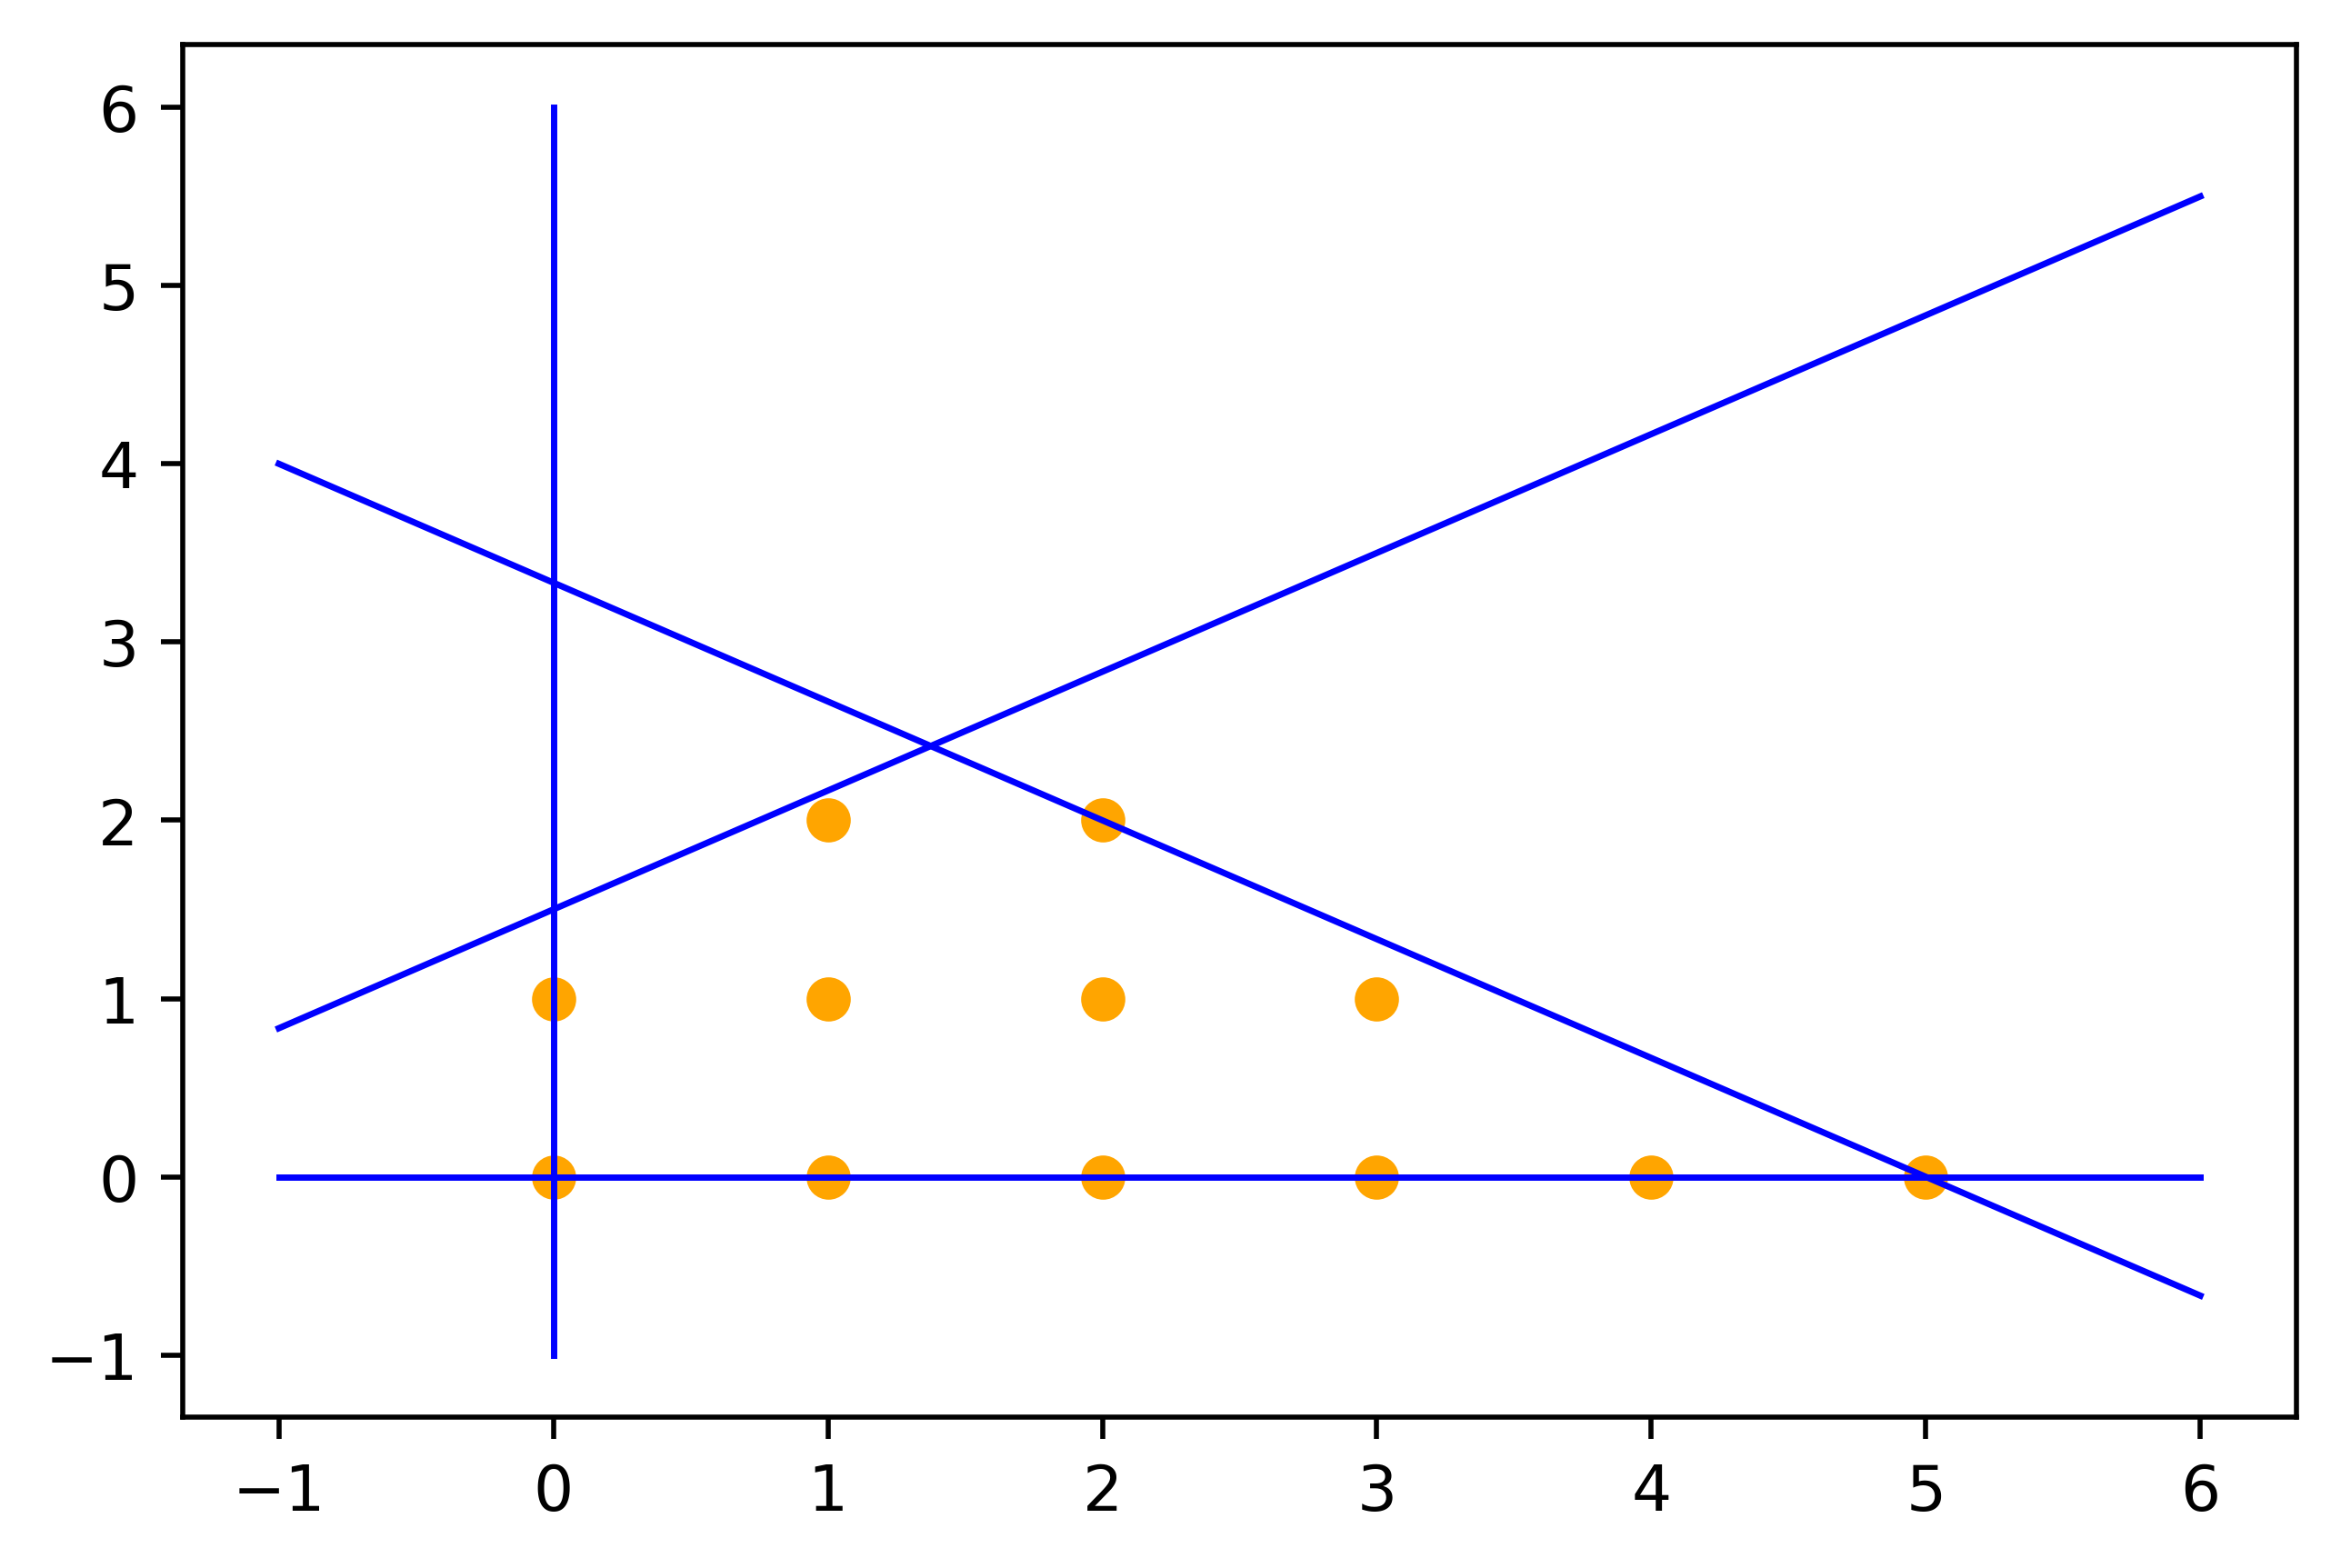

In [8]:
plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)

Assume simplex method finds a fractional solution.
Convert equations to standard form by adding slack variables $x_3, x_4$:
\begin{align}
-4 x_1 + 6 x_2 +x_3 = 9\\
2 x_1 + 3 x_2 +x_4 = 10
\end{align}
We have for example $x_B=(x_1,x_2)$ and $x_N =(x_3,x_4)$ for a fractional solution. 

**Find next cutting plane:**

In [9]:
# A = (B, AN)
B  = sym.Matrix(2, 2, [-4, 6, 2, 3])
AN = sym.Matrix(2, 2, [1, 0, 0, 1])
b  = sym.Matrix(2, 1, [9, 10])

In [10]:
# check for fractional solutions and generate inequalities by them
BIb = B.inv()*b
BIb

Matrix([
[ 11/8],
[29/12]])

This fractional solution is drawn as red dot in the plot below:

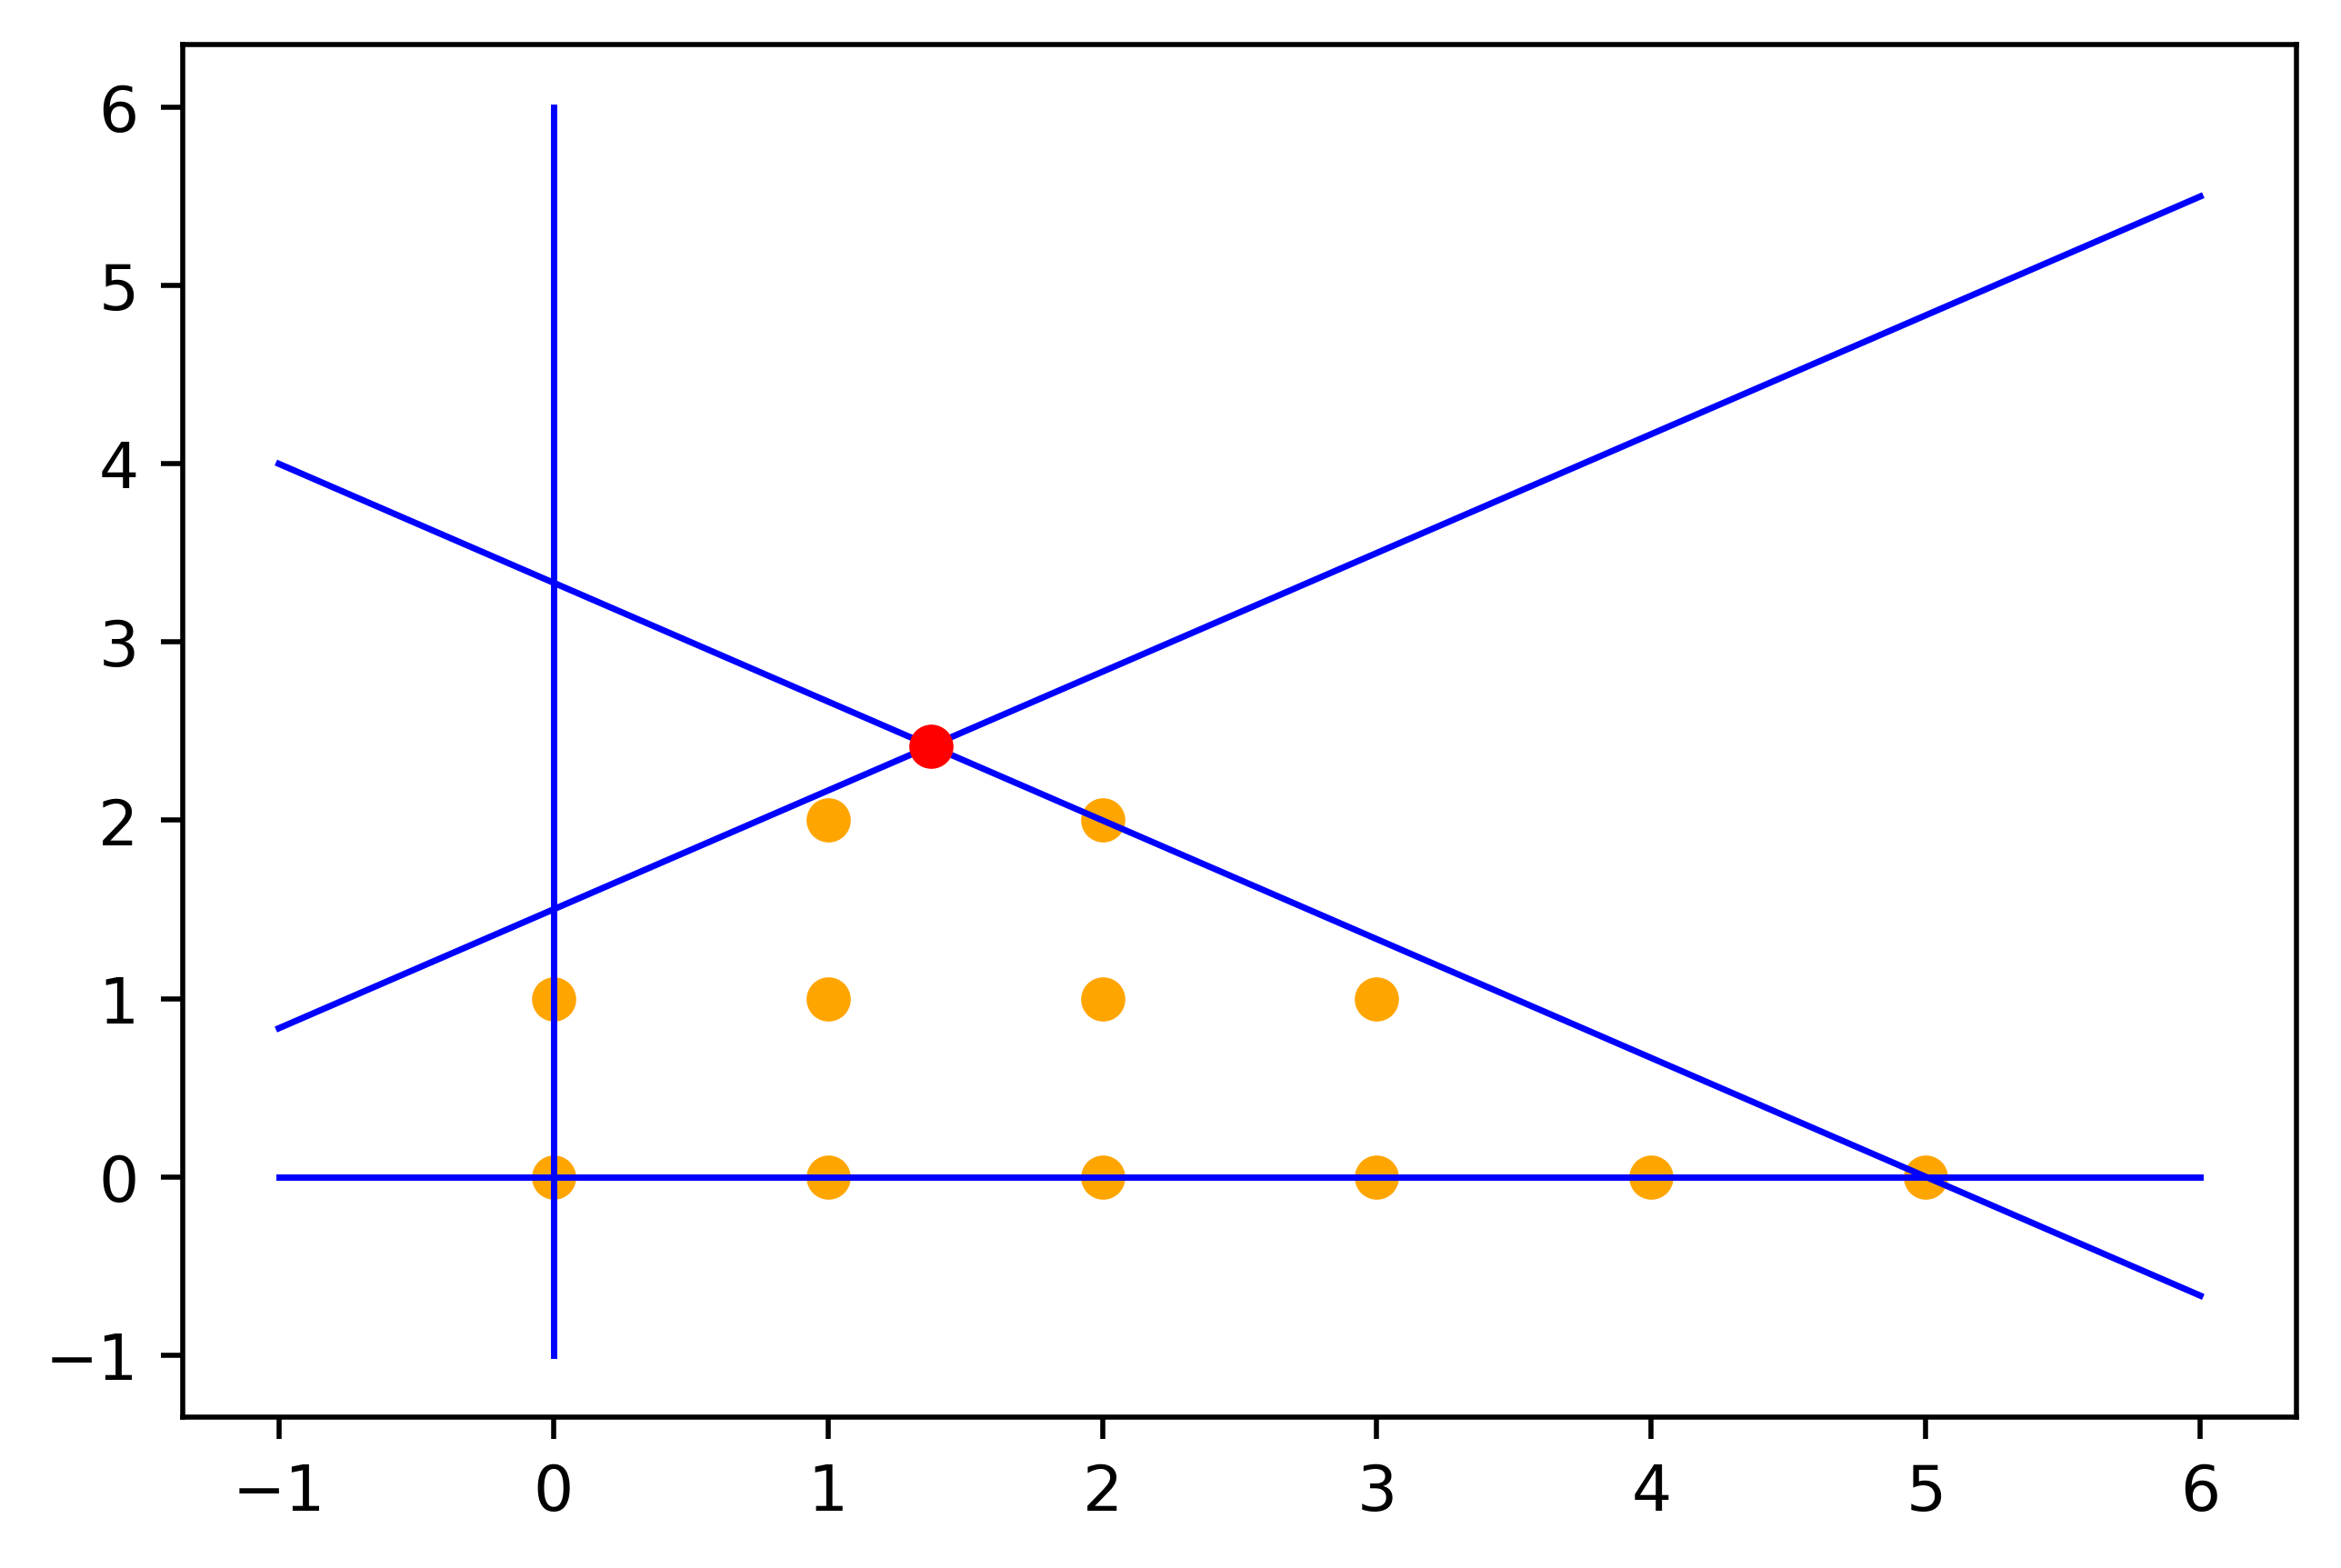

In [11]:
plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)
plt.plot(11/8,29/12,"o",color="red")

Apply rounding:

In [12]:
BIb.applyfunc(lambda x: sym.floor(x))

Matrix([
[1],
[2]])

In [13]:
BI = B.inv()*AN
BI.applyfunc(lambda x: sym.floor(x))

Matrix([
[-1, 0],
[ 0, 0]])

We have then the following inequalities:
\begin{align}
x_1 - x_3 \leq 1\\
x_2 \leq 2\\
\end{align}
If we substitute the non-basic variables by above's definition, we get:
\begin{align}
-3 x_1 +6x_2 \leq 1\\
x_2 \leq 2\\
\end{align}
Where we take the second inequality since the first one is redundant.

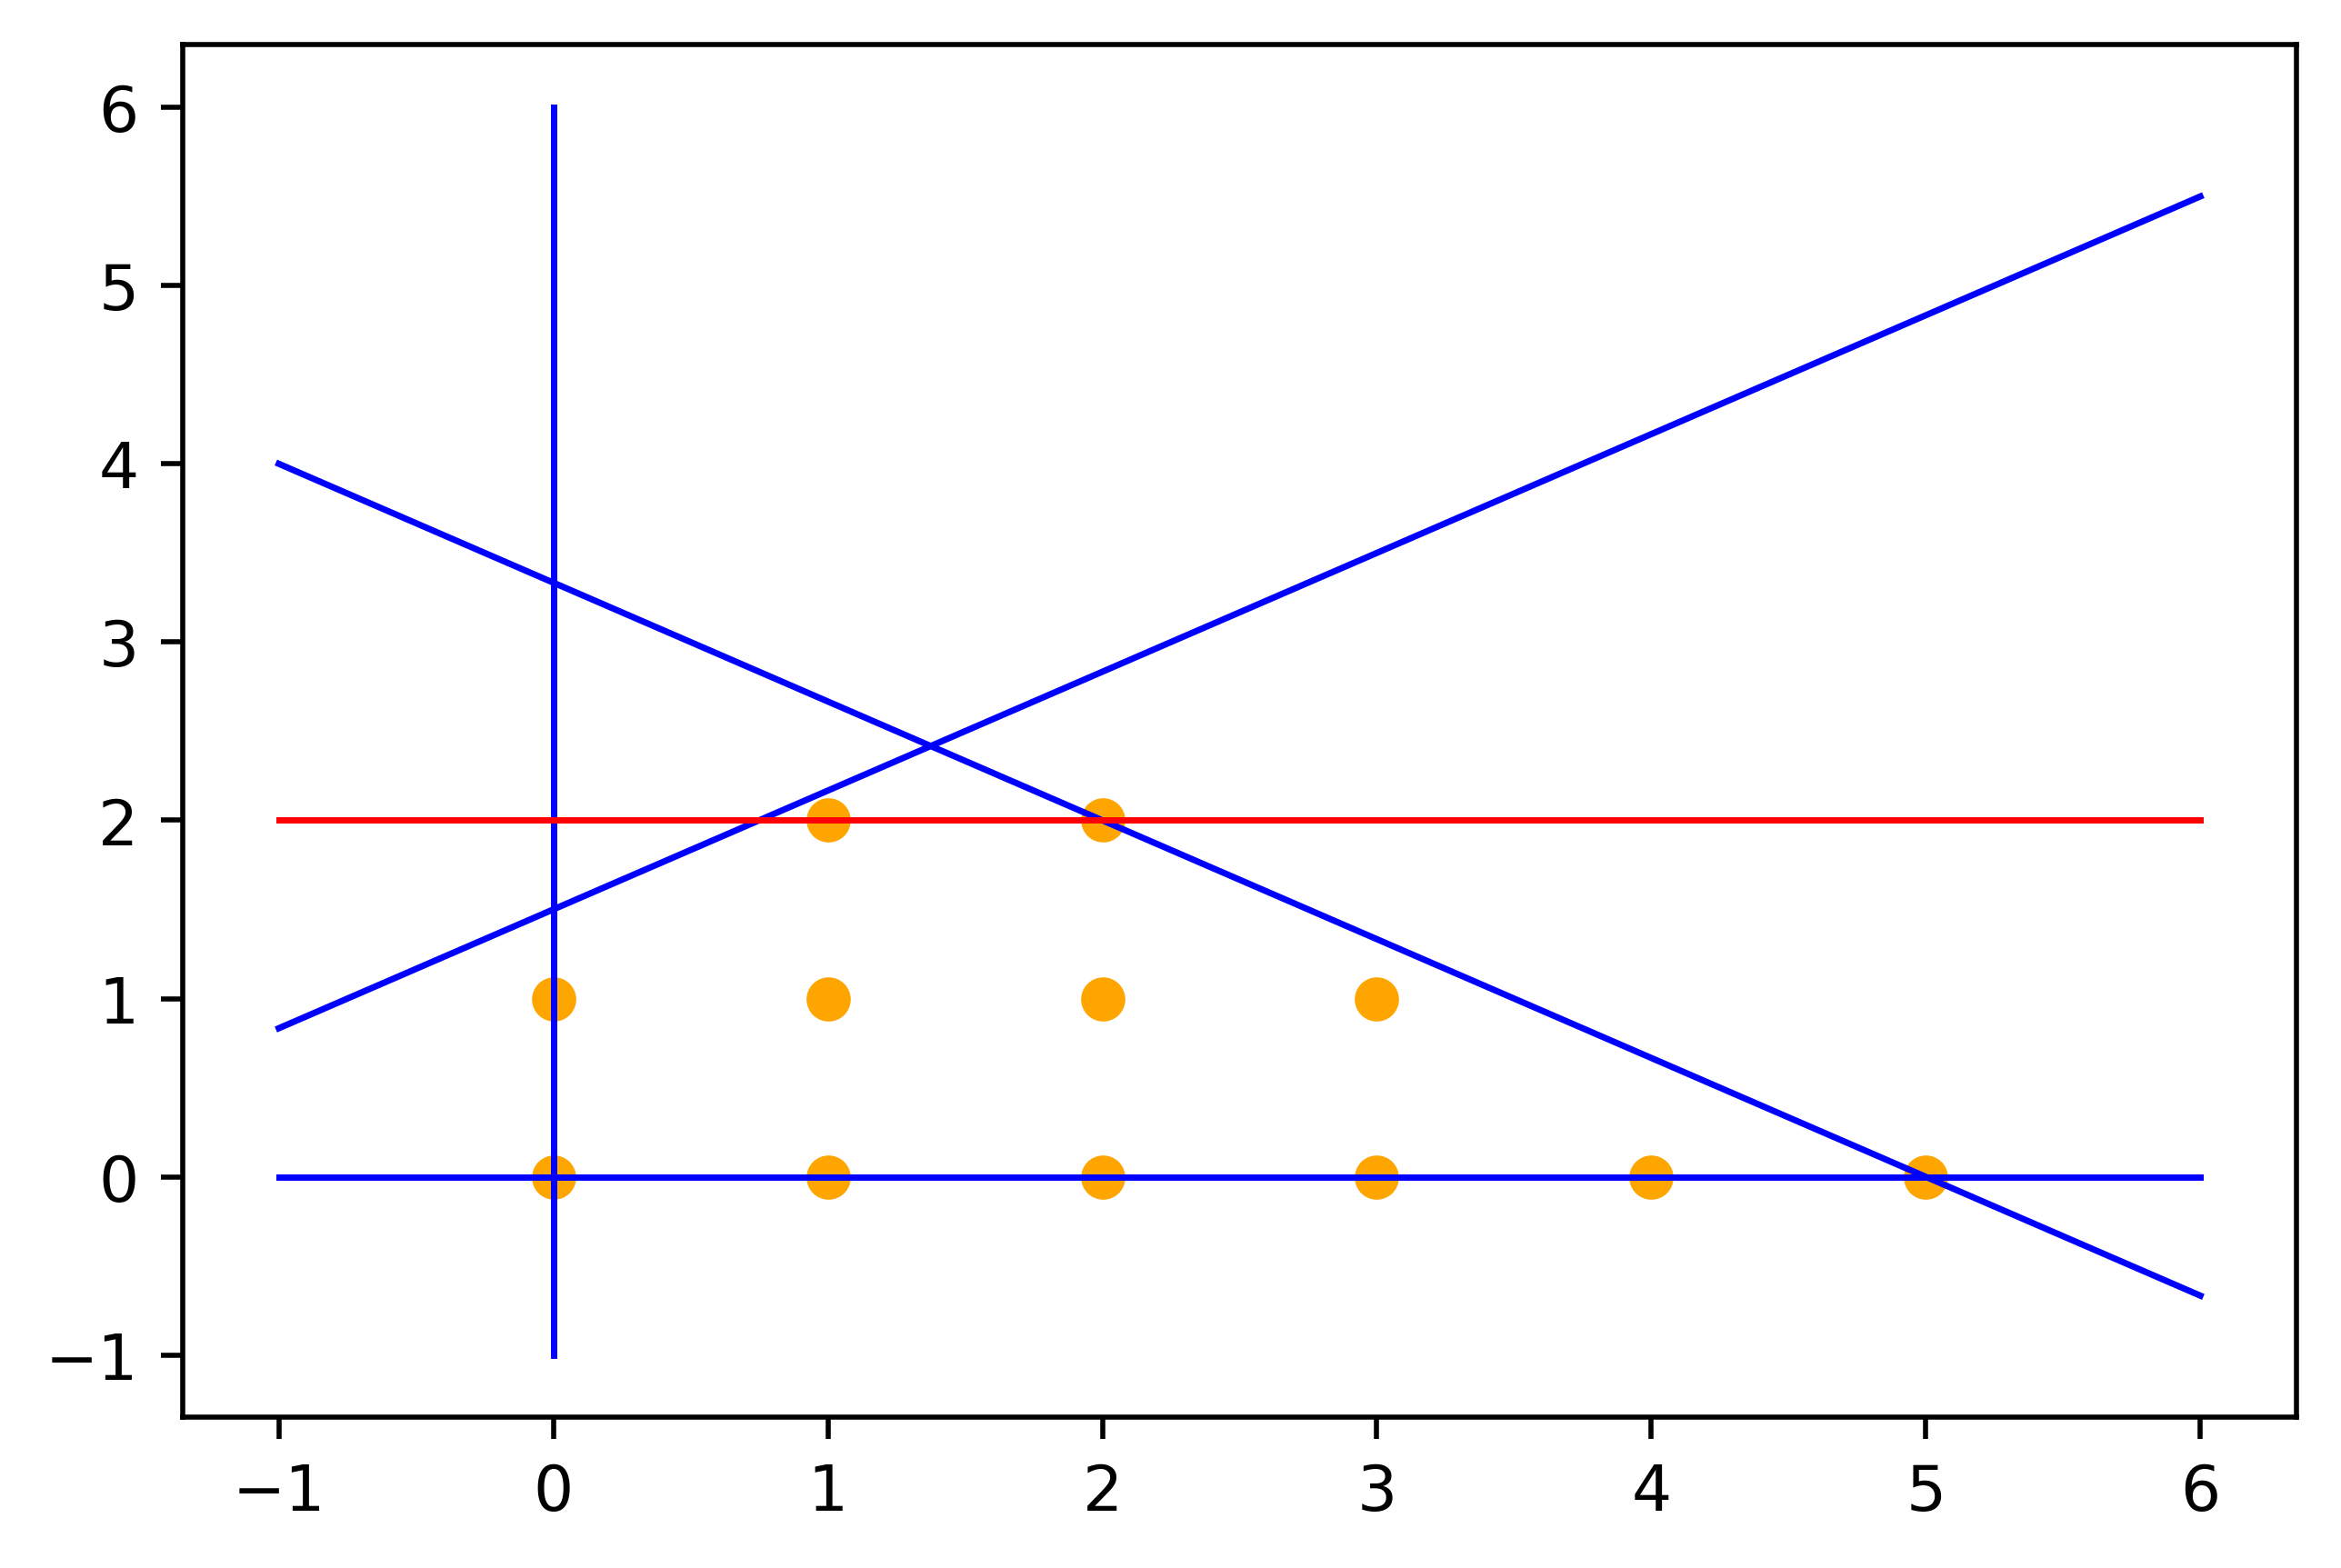

In [14]:
# Add new inequality to plot
x_curve.append(x)
y_curve.append(2+x*0)
col.append("red")

plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)

**Find next cutting plane:**

The standard formulation is now:
\begin{align}
-4 x_1 + 6 x_2 +x_3 = 9\\
2 x_1 + 3 x_2 +x_4 = 10\\
x_2 + x_5 = 2
\end{align}
Again assume the simplex method finds a fractional solution. Since we have three equations, we need three basic variables. This time we take $x_1,x_2,x_4$ as basic variables.

In [15]:
B  = sym.Matrix(3, 3, [-4, 6, 0, 2, 3, 1, 0, 1, 0])
AN = sym.Matrix(3, 2, [1,0,0,0,0,1])
b  = sym.Matrix(3, 1, [9, 10, 2])
B

Matrix([
[-4, 6, 0],
[ 2, 3, 1],
[ 0, 1, 0]])

In [16]:
# check for fractional solutions and generate inequalities by them
BIb = B.inv()*b
BIb

Matrix([
[3/4],
[  2],
[5/2]])

The fractional solution is shown as red dot in the plot below:

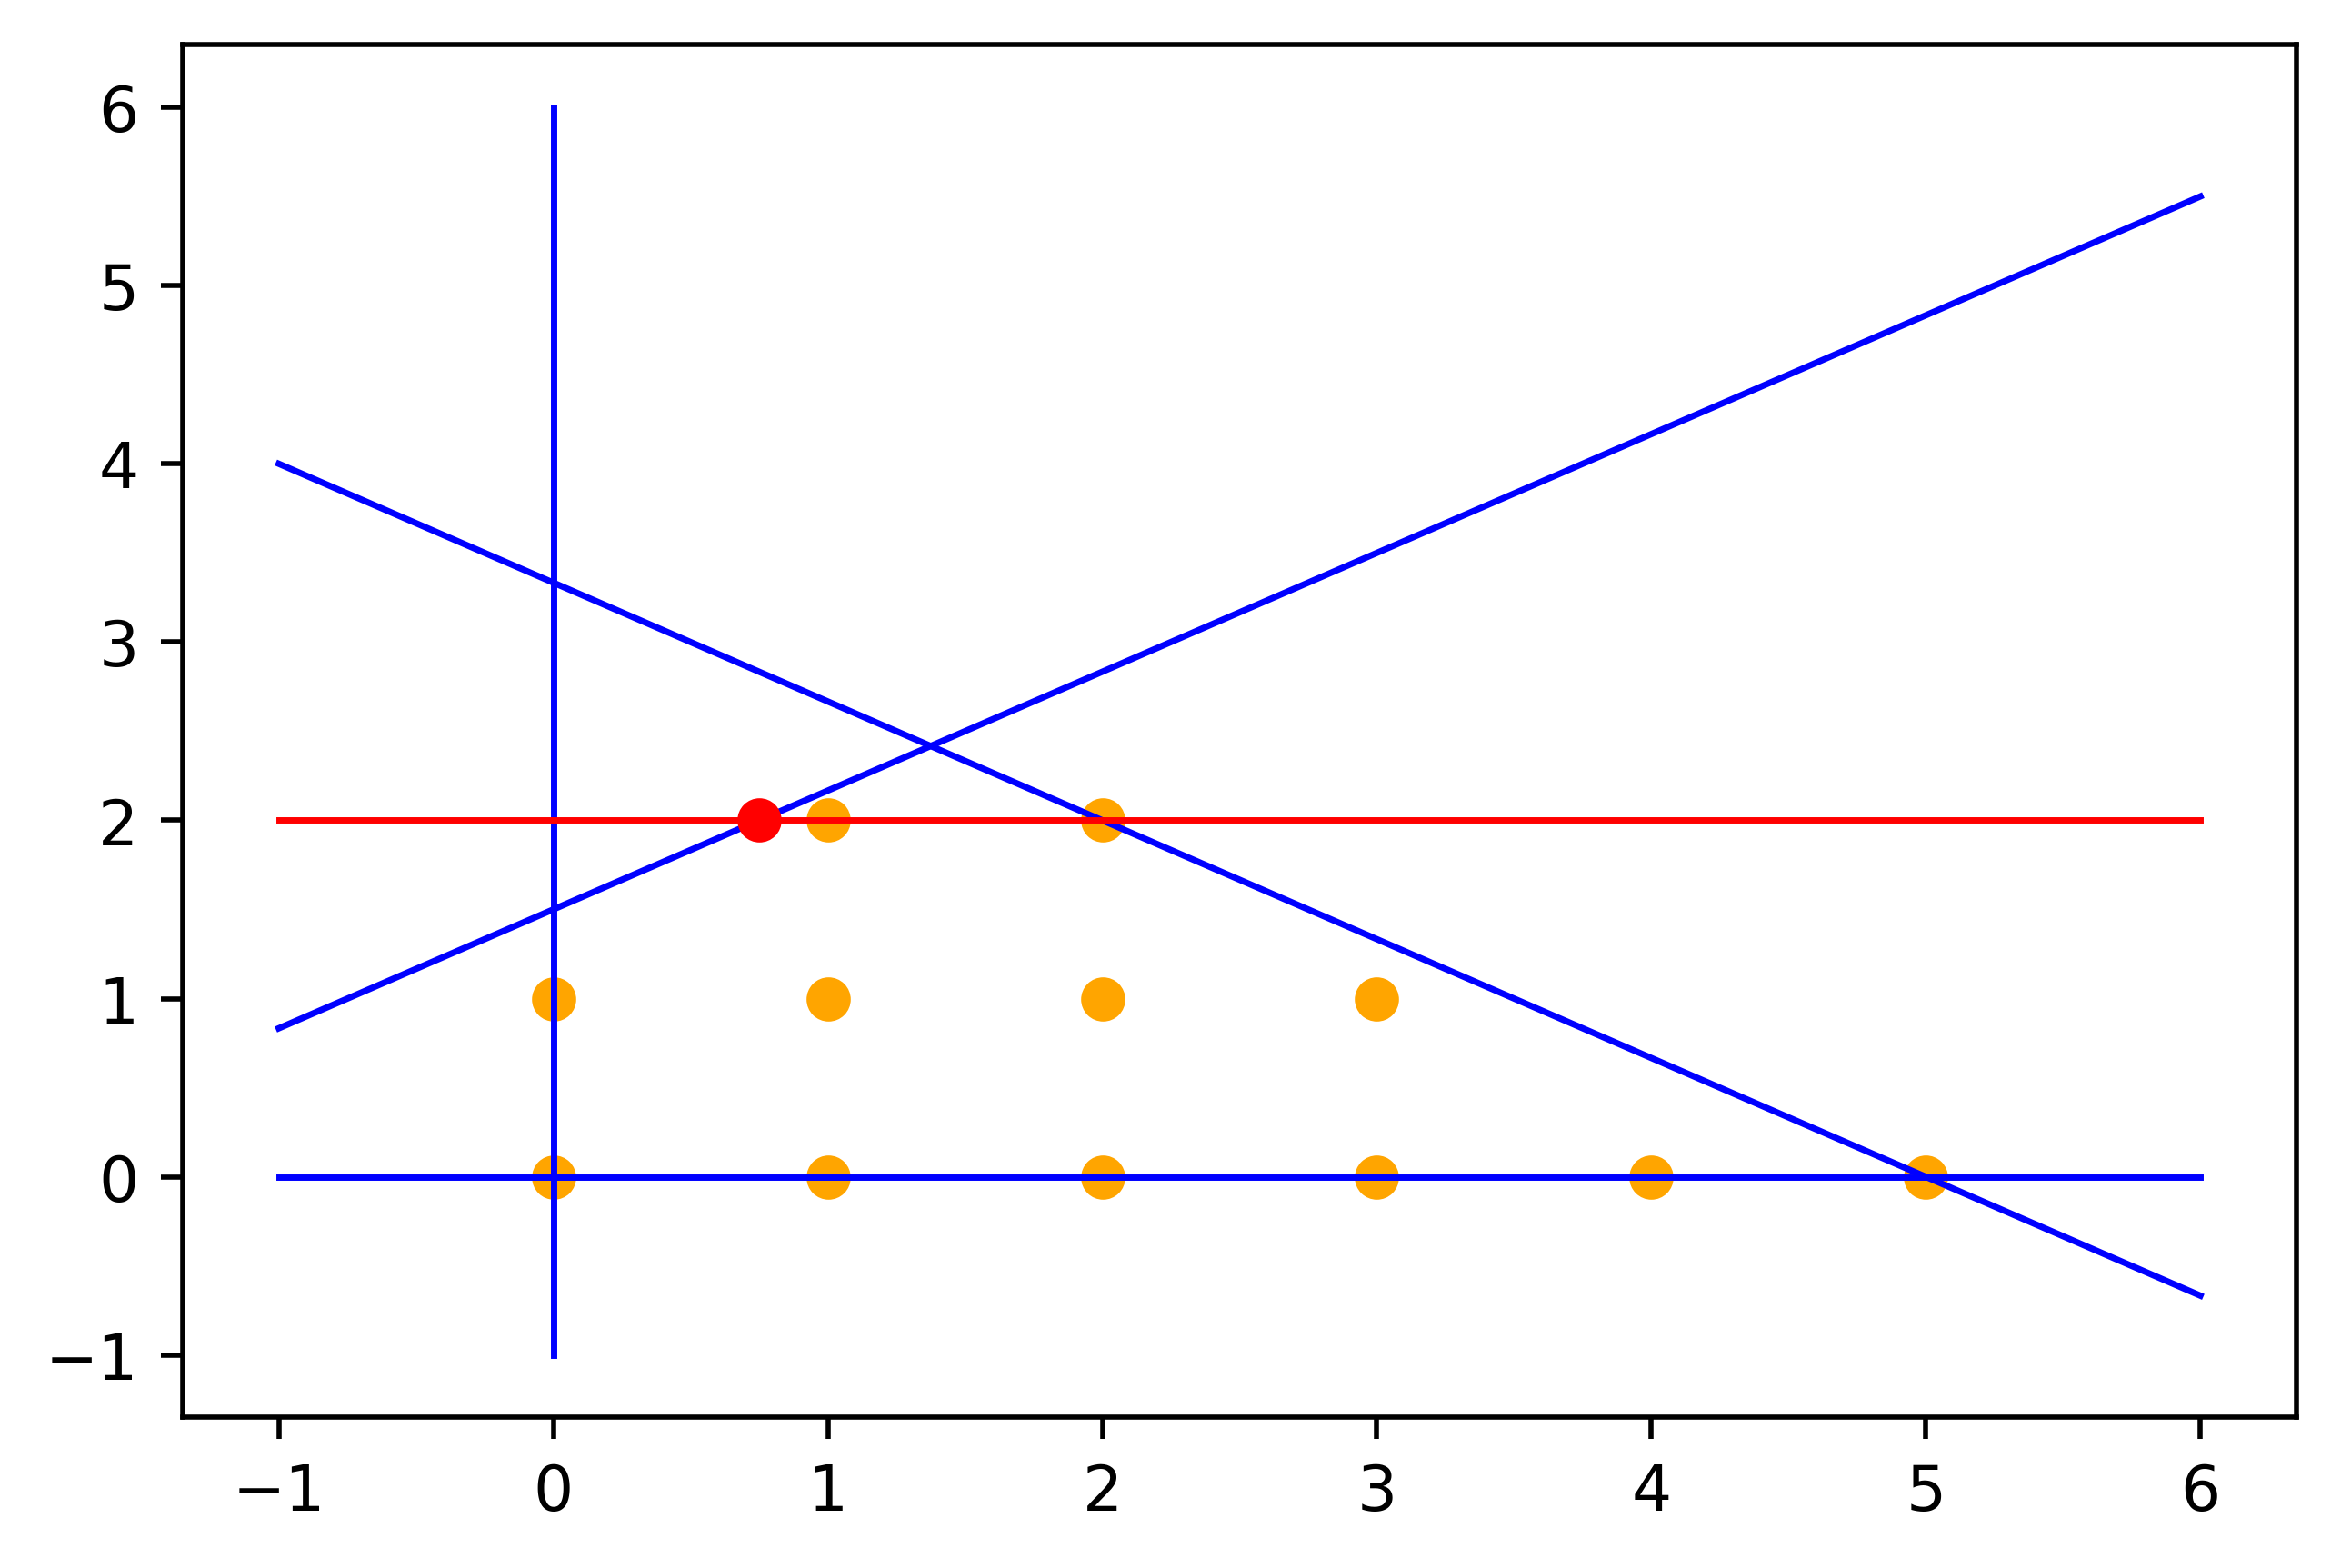

In [17]:
plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)
plt.plot(3/4, 2,"o",color="red")

Apply rounding:

In [18]:
BI = B.inv()*AN
BI.applyfunc(lambda x: sym.floor(x))

Matrix([
[-1,  1],
[ 0,  1],
[ 0, -6]])

In [19]:
BIb.applyfunc(lambda x: sym.floor(x))

Matrix([
[0],
[2],
[2]])

We have then the following inequalities:
\begin{align}
x_1 - x_3 \leq 0\\
x_4 -6x_5 \leq 2\\
\end{align}
If we substitute the non-basic variables $x_3,x_5$ by above's definition we get:
\begin{align}
-3x_1+5x_2 \leq 7\\
-2x_1+3x_2 \leq 4
\end{align}
Next we show the impact of the new inequalities in green and black:

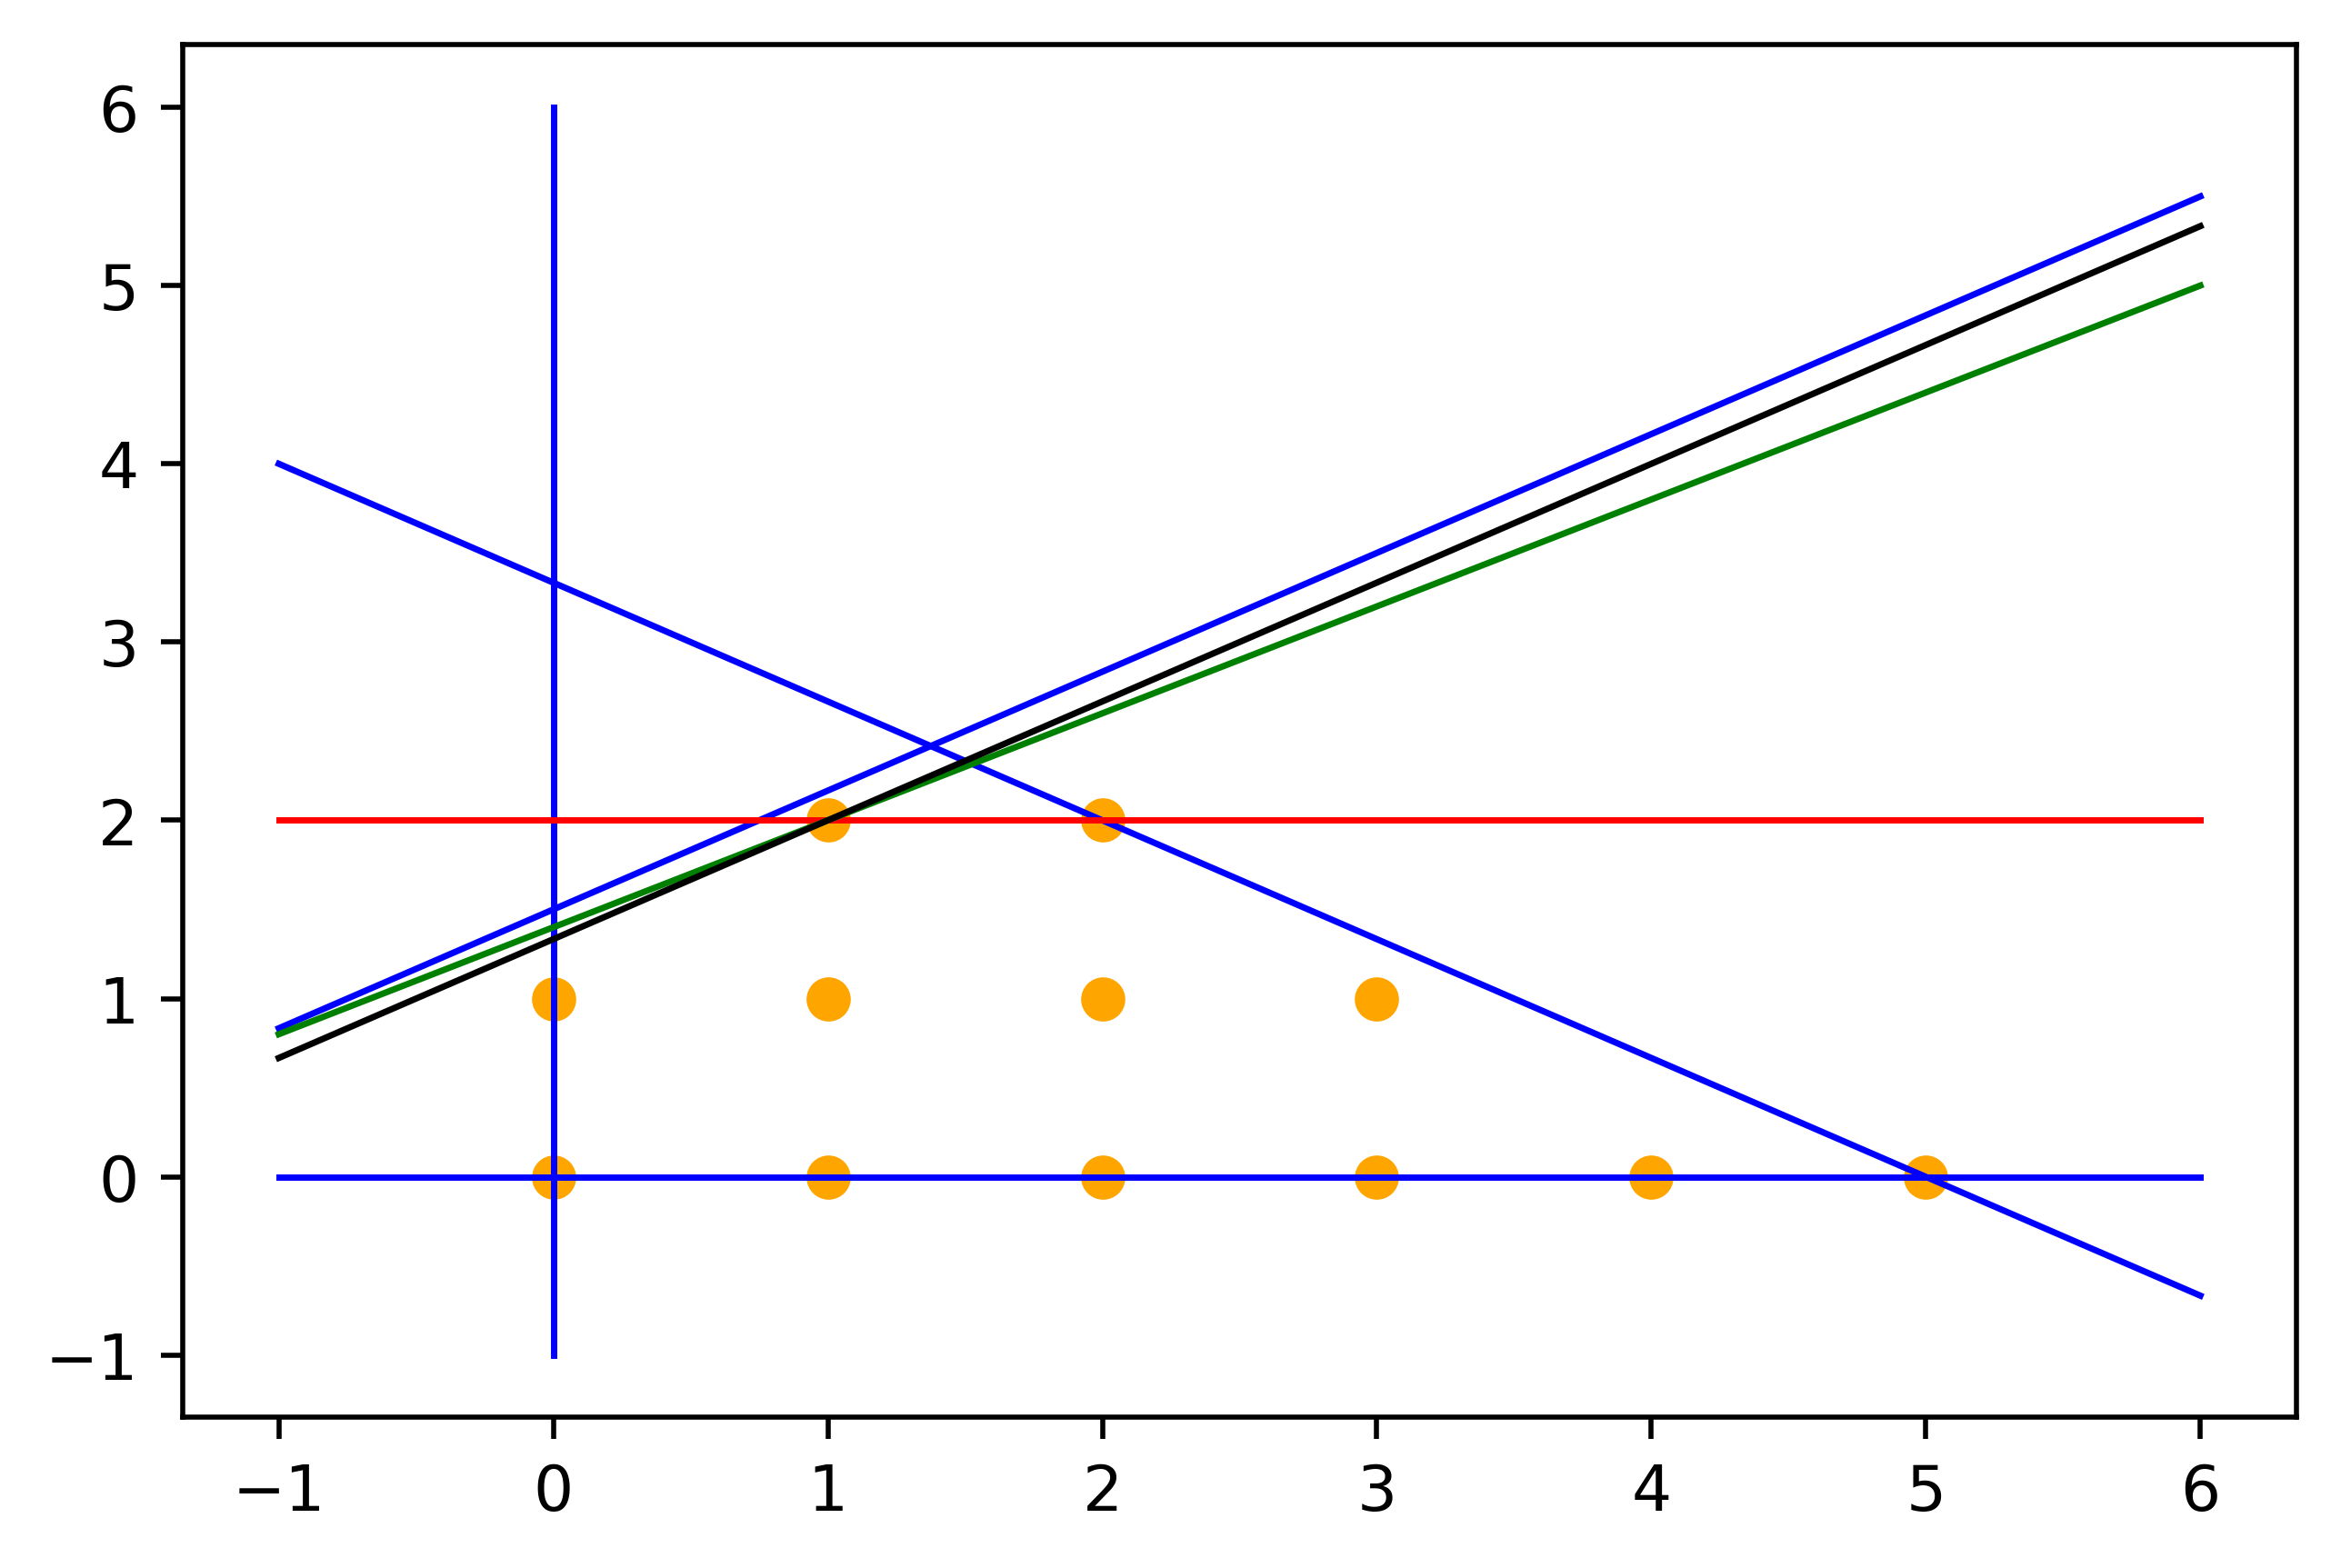

In [20]:
x_curve.append(x)
y_curve.append(7/5+3/5*x)
col.append("green")

x_curve.append(x)
y_curve.append(4/3+2/3*x)
col.append("black")

plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)

Since the second inequality cuts of a bigger piece off, we take it and obtain the standard formulation:
\begin{align}
2 x_1 + 3 x_2 +x_3 = 10\\
x_2 + x_4 = 2\\
-2x_1+3x_2 + x_5 = 4
\end{align}
where the first equation from before became redundant and therefore we don't consider it anymore.

In [21]:
# delete planes that we dont consider anymore
del x_curve[5]
del y_curve[5]
del col[5]
del x_curve[3]
del y_curve[3]
del col[3]

The current polyhedra is therefore:

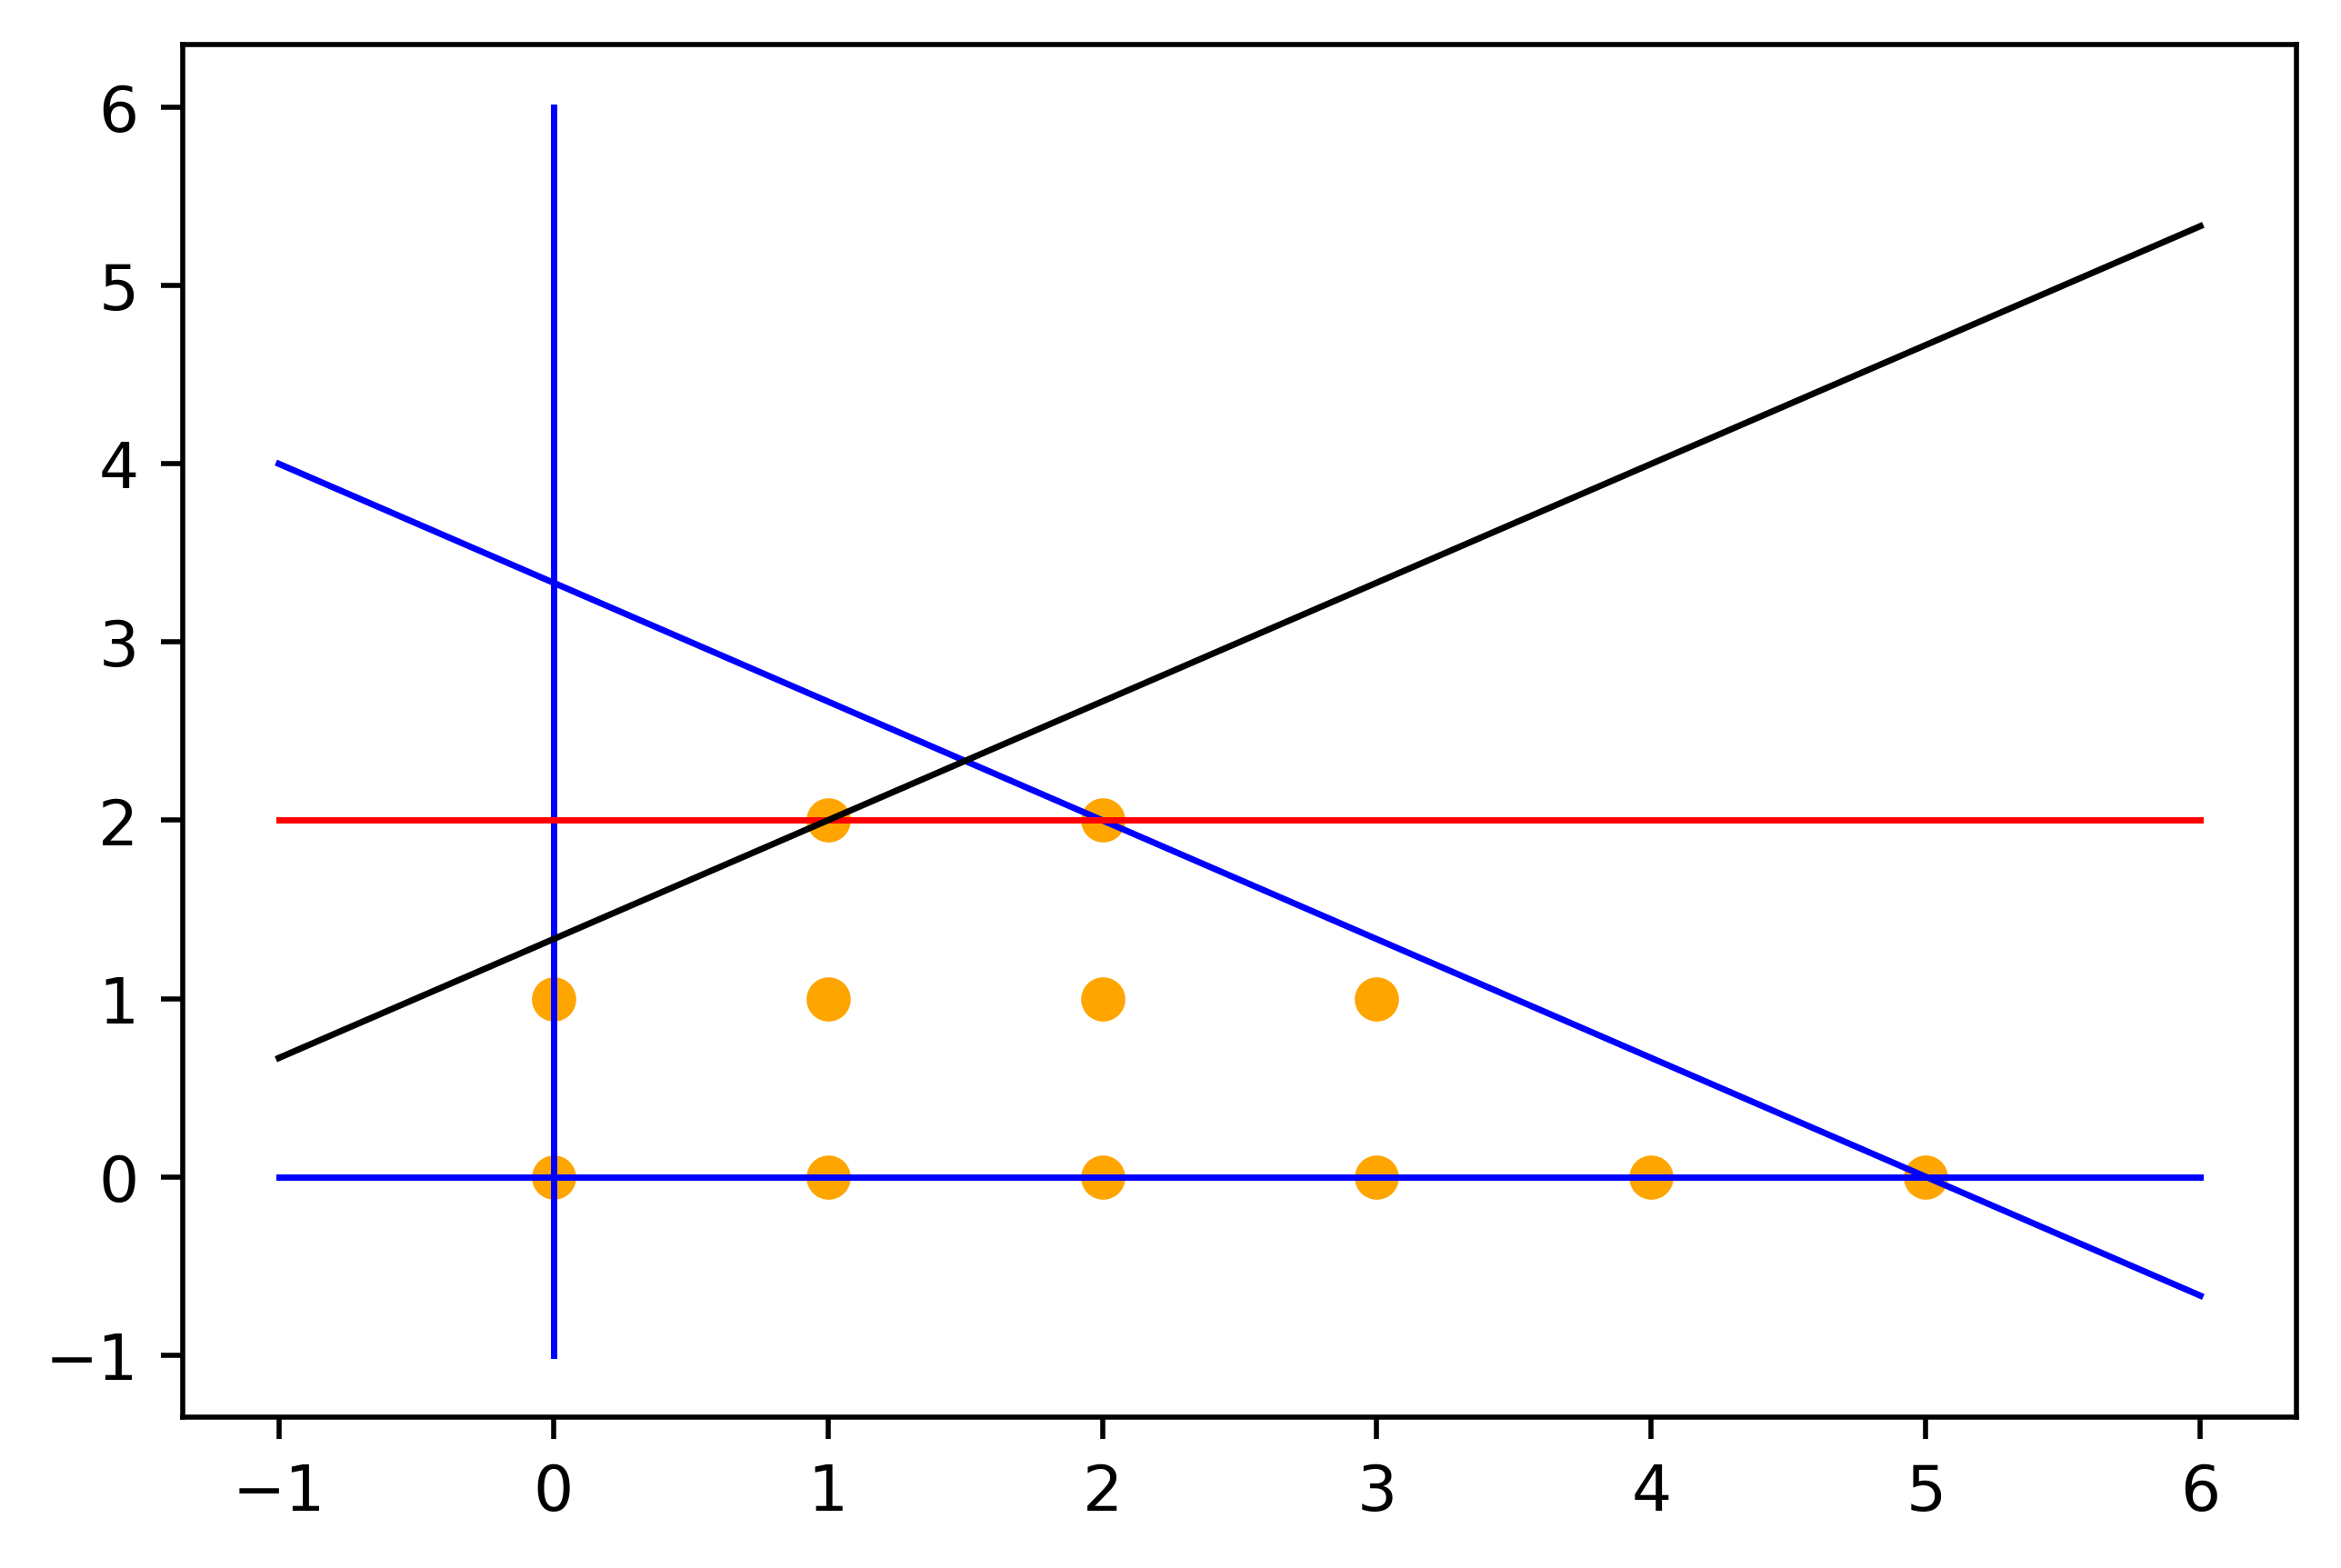

In [22]:
plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)

**Find next cutting plane:**

The simplex method can still find a fractional solution. We get a fractional solution if we take $x_2,x_3,x_5$ as basic variables:

In [23]:
B  = sym.Matrix(3, 3, [3, 1, 0, 
                       1, 0, 1, 
                       3, 0, 0])
AN = sym.Matrix(3, 2, [2,0,
                       0,0,
                      -2,1])

b  = sym.Matrix(3, 1, [10, 2, 4])
B

Matrix([
[3, 1, 0],
[1, 0, 1],
[3, 0, 0]])

In [24]:
# check for fractional solutions and generate inequalities by them
BIb = B.inv()*b
BIb

Matrix([
[4/3],
[  6],
[2/3]])

This solution corresponds to the red point drawn below (note $x_1=0$) :

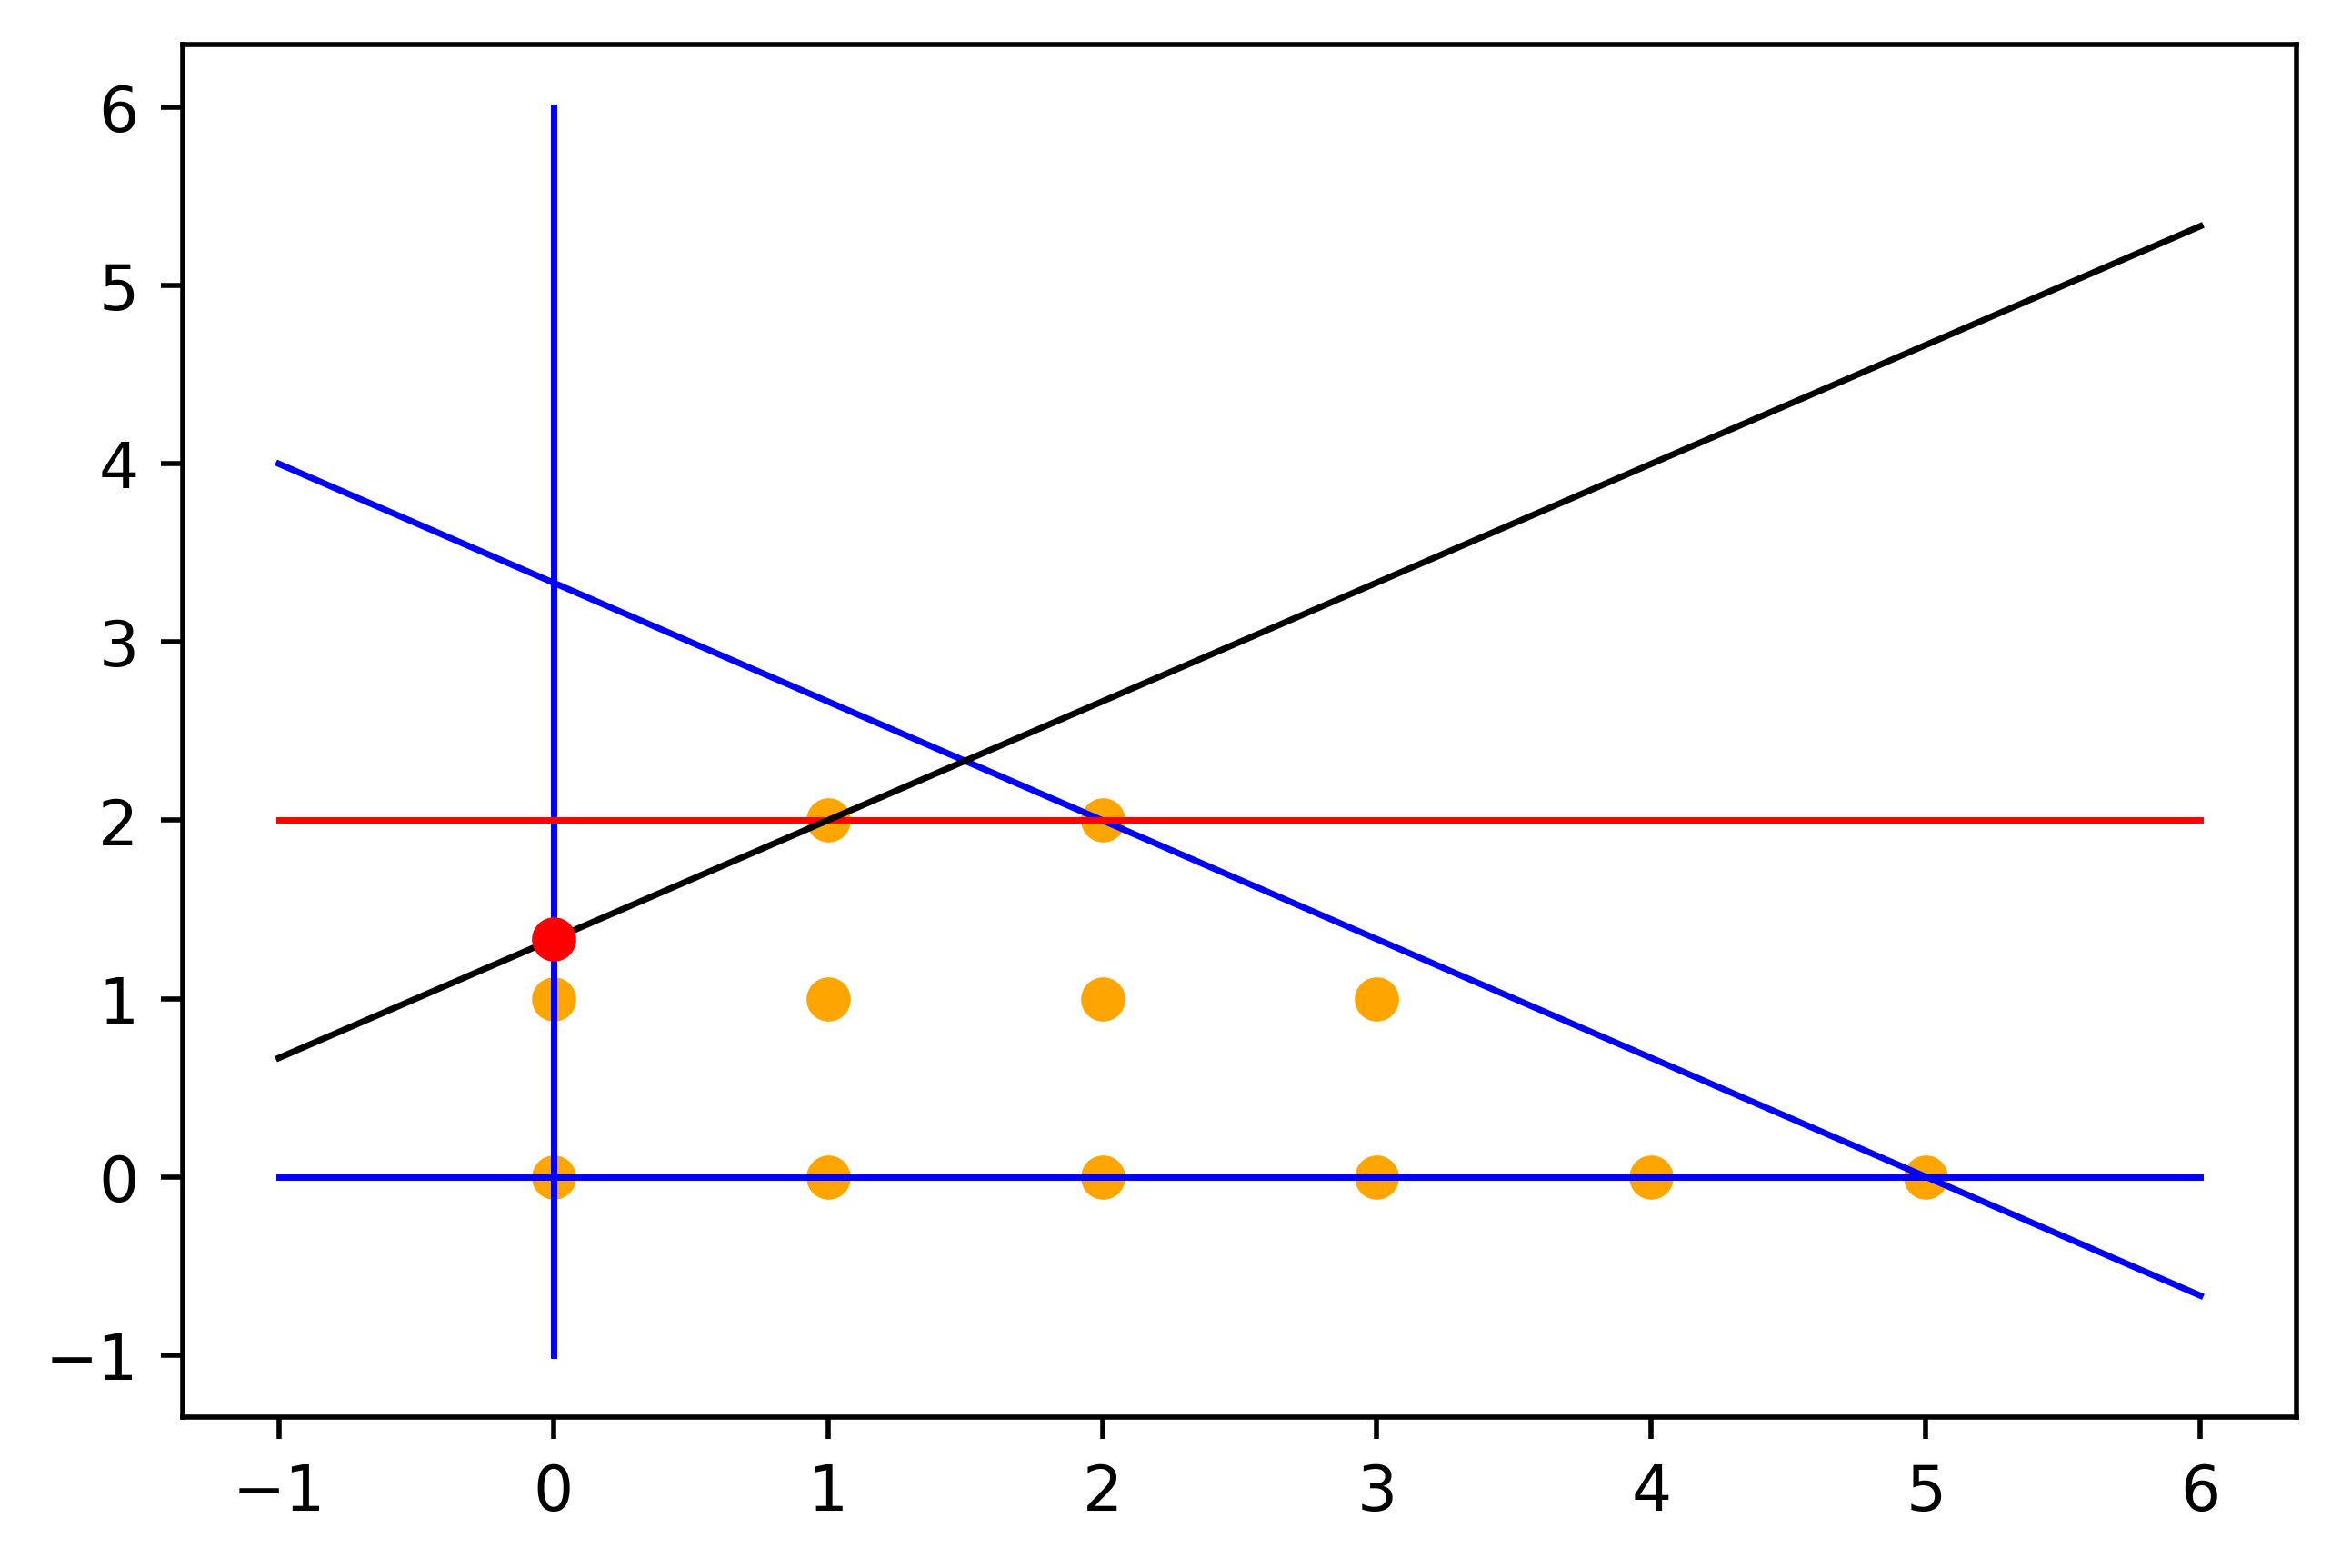

In [25]:
plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)
plt.plot(0, 4/3,"o",color="red")

Apply rounding:

In [26]:
BI = B.inv()*AN
BI.applyfunc(lambda x: sym.floor(x))

Matrix([
[-1,  0],
[ 4, -1],
[ 0, -1]])

In [27]:
BIb.applyfunc(lambda x: sym.floor(x))

Matrix([
[1],
[6],
[0]])

We just need to consider the first inequality that gives:
\begin{align}
x_2 - x_1 \leq 1
\end{align}
If we draw the cutting plane that corresponds to this equation in cyan, we get:

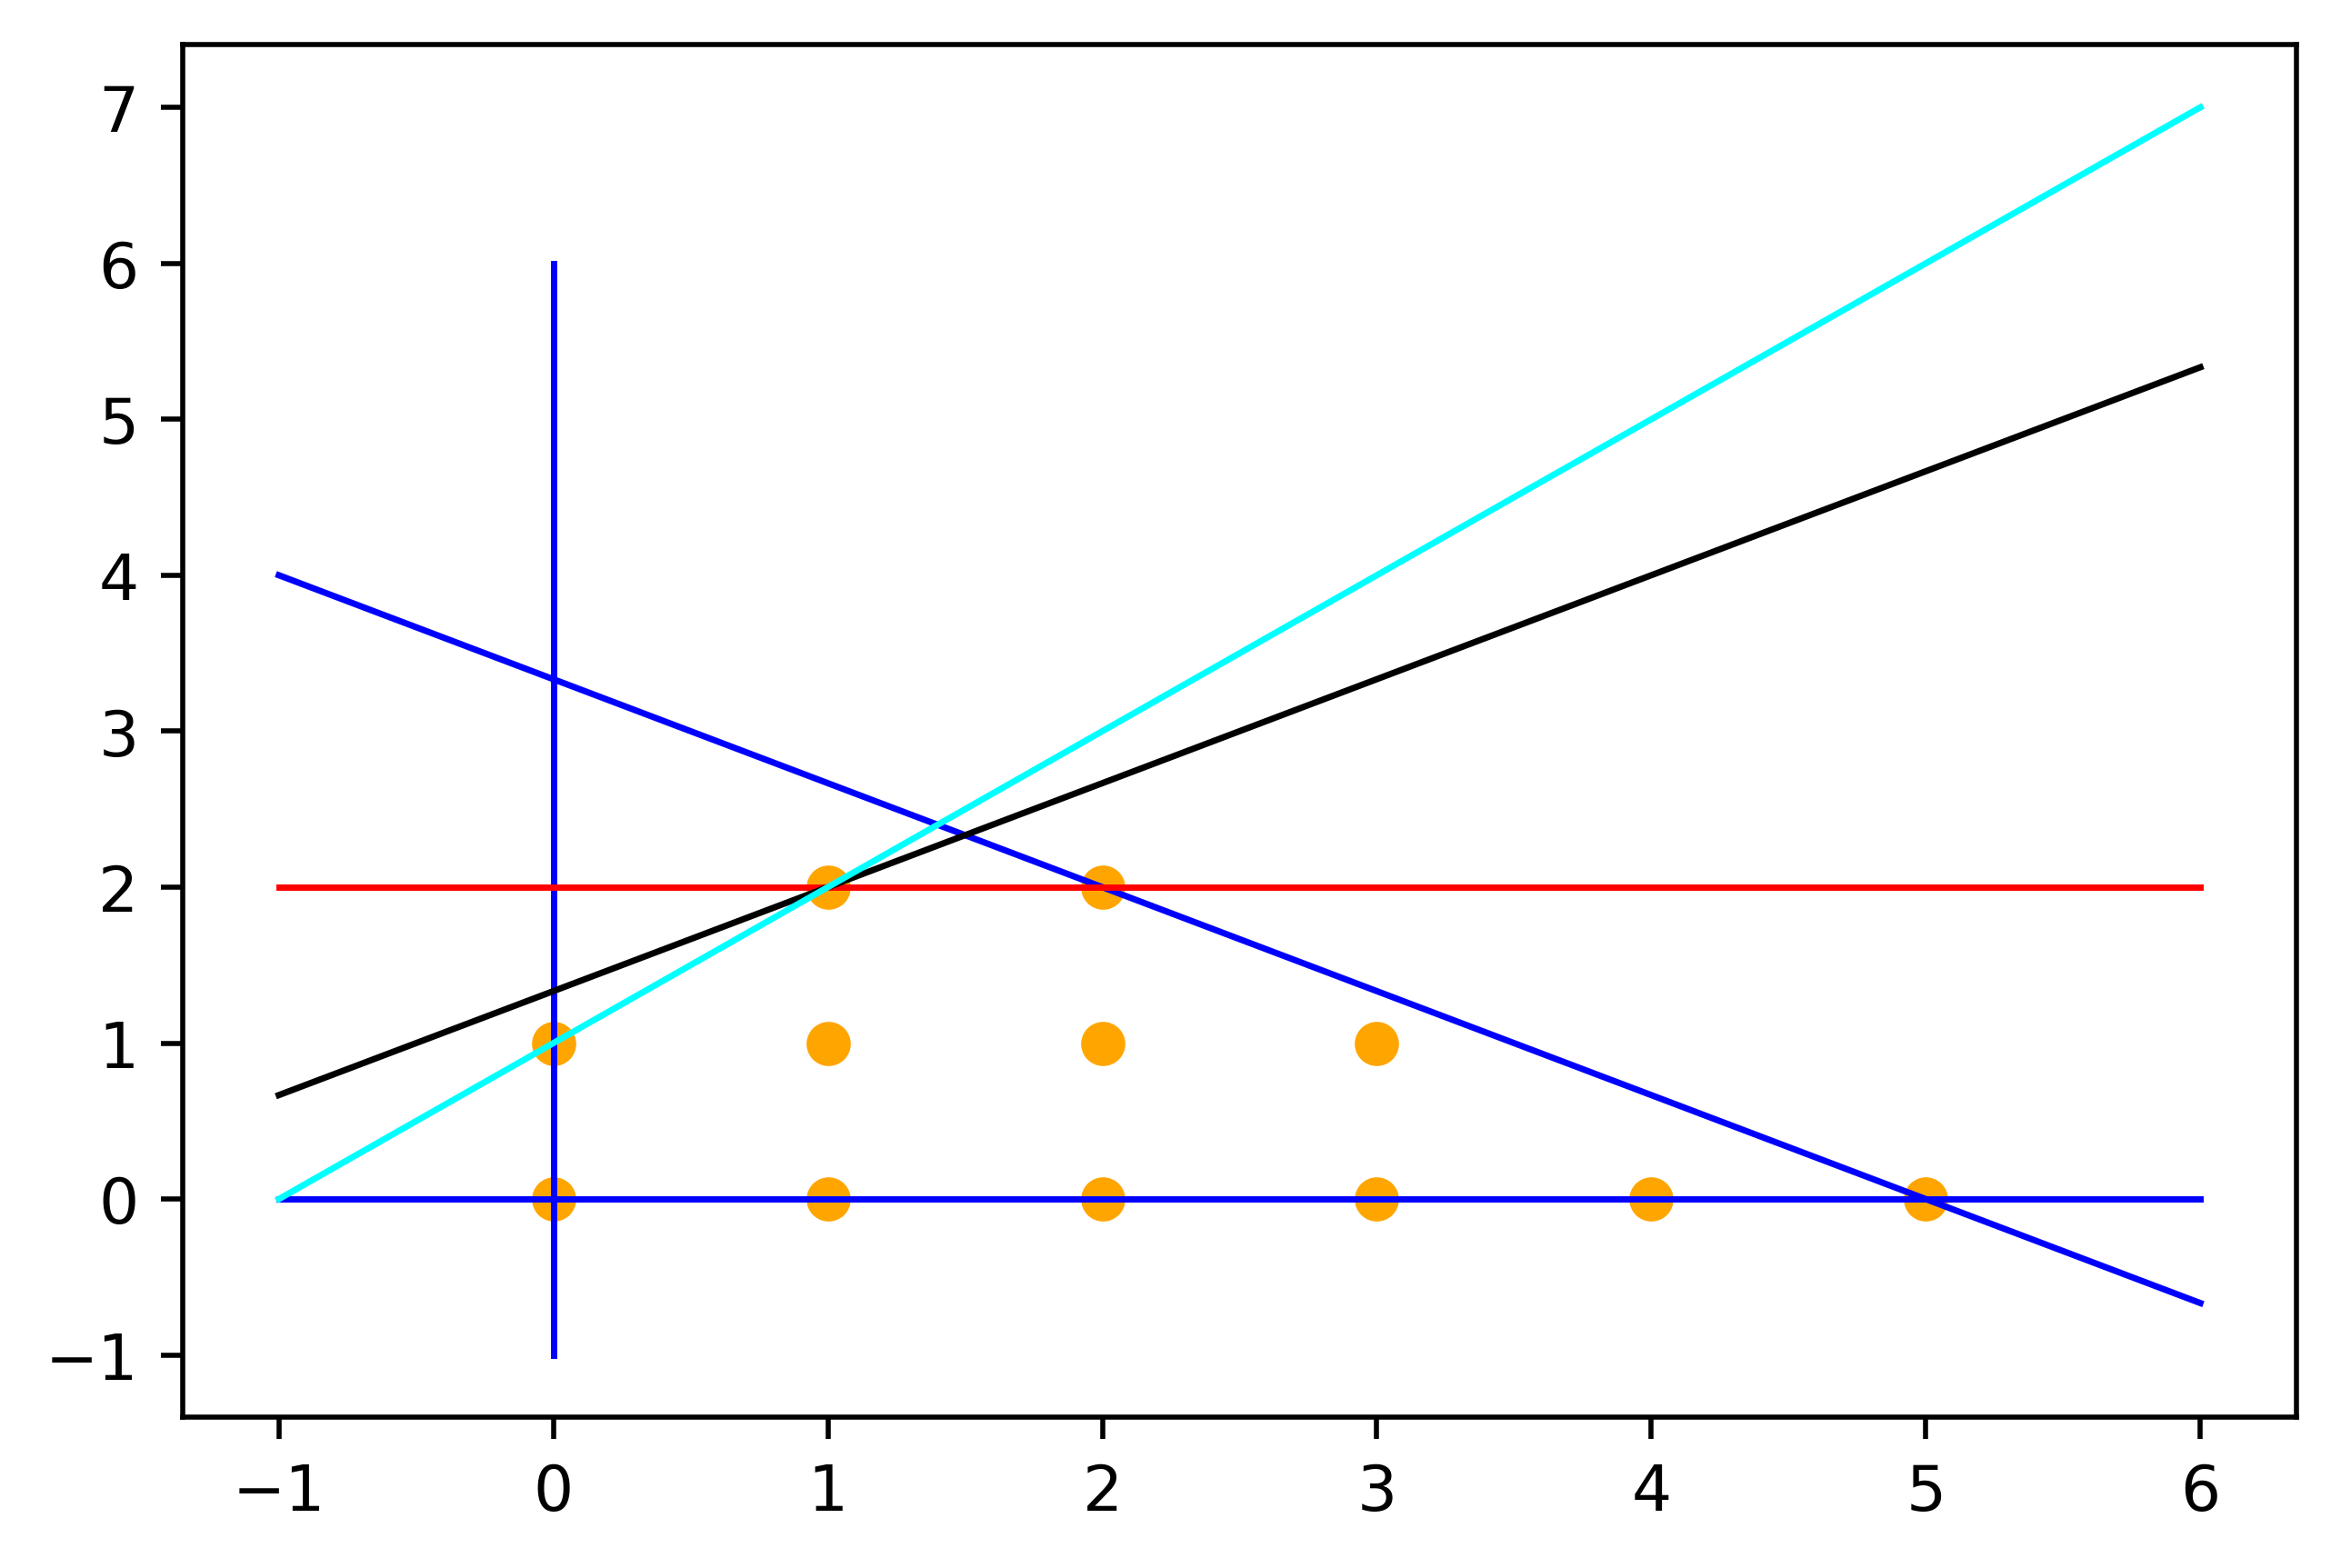

In [28]:
x_curve.append(x)
y_curve.append(1+x)
col.append("cyan")

plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)

The cutting plane in black from before is now redundant, and we see that the convex hull of our polyhedra is given by:
\begin{align}
2 x_1 + 3 x_2 \leq 10\\
x_2 \leq 2\\
x_2 - x_1 \leq 1\\
x_1,x_2 \geq 0
\end{align}

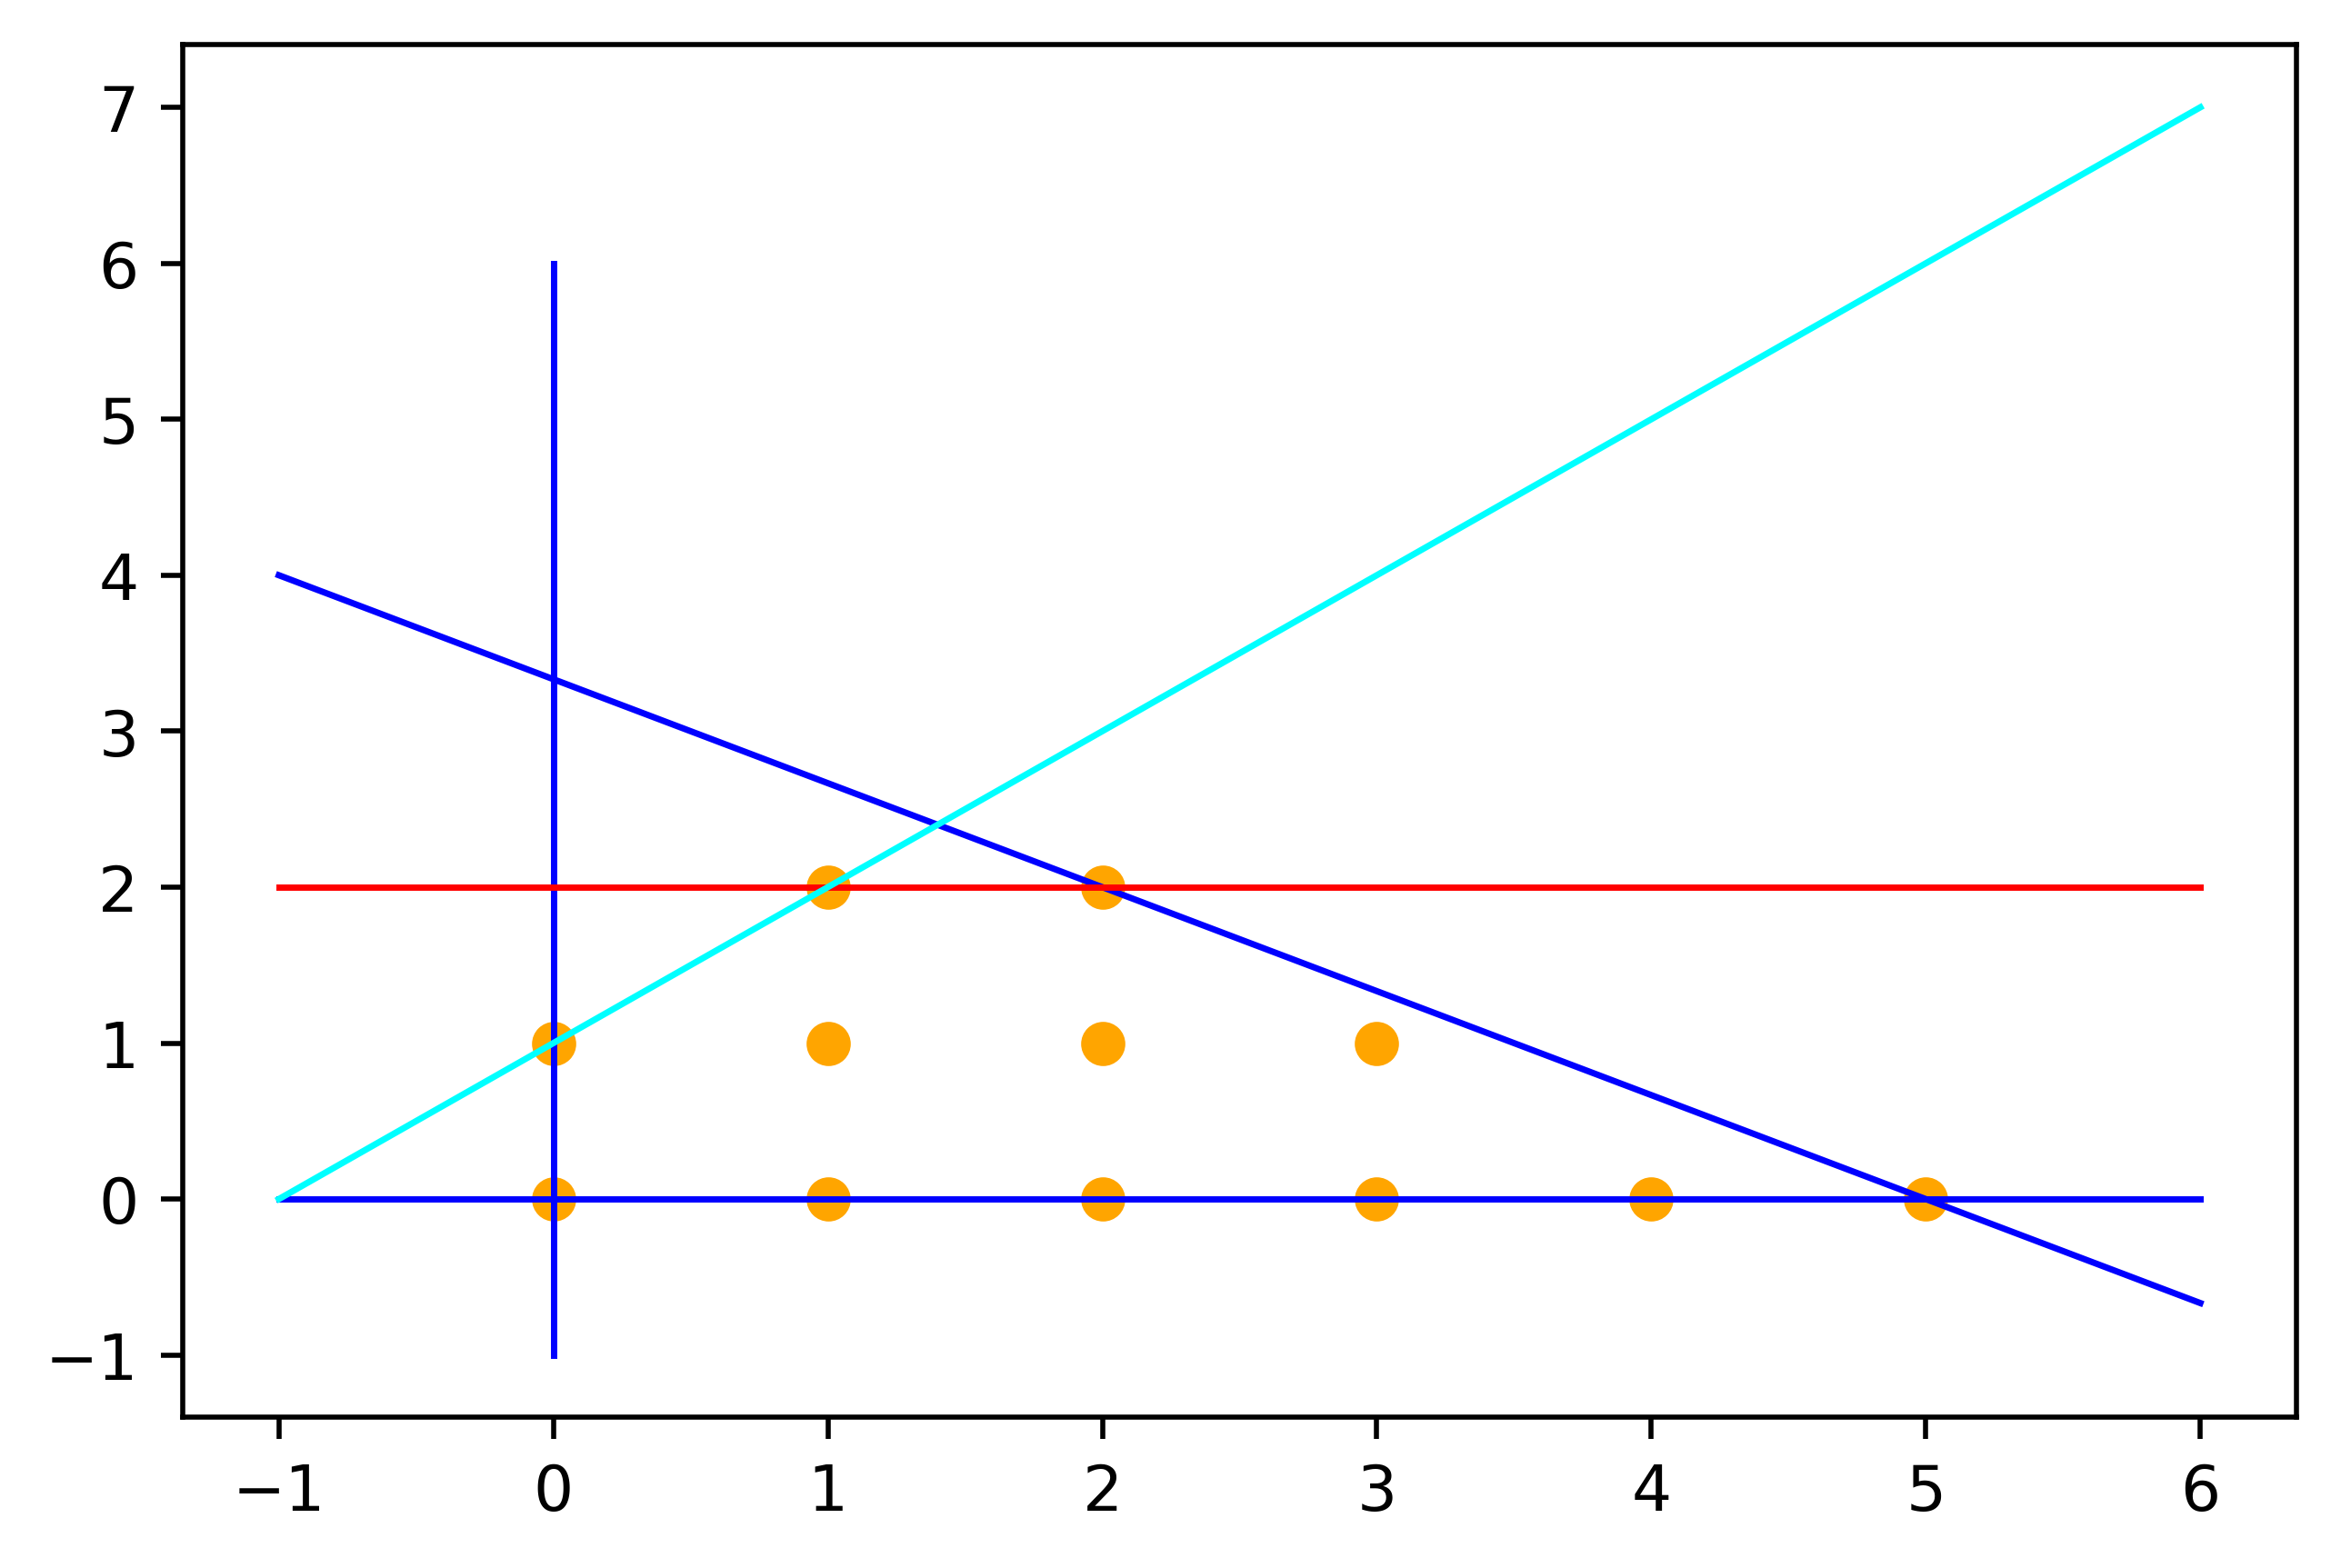

In [29]:
del x_curve[-2]
del y_curve[-2]
del col[-2]
plot_polyhed(X[mask], Y[mask], x_curve, y_curve, col)


## Exercise 7 Cover Inequality

In [30]:
# plot list of variables with constraint value lower than 15
weights = np.array([12,9,7,5,5,3],dtype="int")
values  = np.unpackbits( np.arange(2**6, dtype="uint8") ).reshape(-1,8)[:,2:]
value_weights = np.sum(values*weights, axis=1)[:,None]
selection_list = np.concatenate((values, value_weights), axis=1)
# remove entries that exeed 14:
selection_list = selection_list[selection_list[:,-1]<=14]
print(selection_list)

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3]
 [ 0  0  0  0  1  0  5]
 [ 0  0  0  0  1  1  8]
 [ 0  0  0  1  0  0  5]
 [ 0  0  0  1  0  1  8]
 [ 0  0  0  1  1  0 10]
 [ 0  0  0  1  1  1 13]
 [ 0  0  1  0  0  0  7]
 [ 0  0  1  0  0  1 10]
 [ 0  0  1  0  1  0 12]
 [ 0  0  1  1  0  0 12]
 [ 0  1  0  0  0  0  9]
 [ 0  1  0  0  0  1 12]
 [ 0  1  0  0  1  0 14]
 [ 0  1  0  1  0  0 14]
 [ 1  0  0  0  0  0 12]]


**i)**
A minimum cover for our Knapsack is for example $C=\{2,4,6\}$ with the cover inequality:
\begin{align}
x_2+x_4+x_6 \leq 2
\end{align}
**ii)**
To extend C we see that $\{j: a_j\geq a_i\forall i\in C\}=\{1\}$. Therefore, the extended cover is given by E(C)=\{1,2,4,6\} and has the inequality:
\begin{align}
x_1 +x_2 +x_4+x_6 \leq 2
\end{align}
**iii)**
Consider again $C=\{2,4,6\}$. For the first lifting coefficient, we have the inequality:
\begin{align}
\alpha_1 x_1 +x_2 +x_4+x_6 \leq 2
\end{align}
Which is clearly fulfilled if $x_1=0$ and for $x_1=1$ we get the new Knapsack problem:
\begin{align}
\max x_2 + x_4+x_6\\
\text{ s.t } 9x_2+ 5x_4 + 3x_6 \leq 14-12=2
\end{align}
We can easily see that $\max x_2 + x_4+x_6 =0$ and therefore $\alpha_1 =2$ resulting in the inequality:
\begin{align}
2 x_1 +x_2 +x_4+x_6 \leq 2
\end{align}
We continue to calculate the next lifting coefficient:
\begin{align}
2 x_1 +x_2 + \alpha_3 x_3 +x_4+x_6 \leq 2
\end{align}
Again this inequality is valid for $x_3=0$ and for $x_3=1$ we solve the Knapsack:
\begin{align}
\max 2 x_1 +x_2 +x_4+x_6\\
\text{ s.t } 12x_1 + 9x_2+ 5x_4 + 3x_6 \leq 14-7=7
\end{align}
The solution has $\max 2 x_1 +x_2 +x_4+x_6=1$ such that $\alpha_3=1$ and the lifted inequality is:
\begin{align}
2 x_1 +x_2 + x_3 +x_4+x_6 \leq 2
\end{align}
For the calculation of the last lifting coefficient, we have the inequality:
\begin{align}
2 x_1 +x_2 + x_3 +x_4+ \alpha_5 x_5+x_6 \leq 2
\end{align}
The inequality is valid for $x_5=0$.
When setting $x_5=1$ the Knapsack for the sub-problem is:
\begin{align}
\max 2 x_1 +x_2 + x_3 +x_4+x_6\\
\text{ s.t } 12x_1 + 9x_2+ 7x_3+ 5x_4 + 3x_6 \leq 14-5=9
\end{align}
Now $\max 2 x_1 +x_2 + x_3 +x_4+x_6 =2$ since we can set $x_4=1,x_6=1$. Therefore $\alpha_5=0$ and the final lifted inequality is given by:
\begin{align}
2 x_1 +x_2 + x_3 +x_4+x_6 \leq 2
\end{align}

## Exercise 8 Totally Unimodularity 

**i) The node-edge incidence matrix of all simple, undirected graphs is totally unimodular** 
This is not true. Consider the counterexample:
\begin{align} A_1 = 
\left[ \begin{array}{rrr}
0 & 1 & 1 \\ 
1 & 0 & 1 \\
1 & 1 & 0 \\ 
\end{array}\right]
\end{align}
here we have $det(A_1)=2$ and therefore $A_1$ is not totally unimodular. Since this matrix corresponds to a node-edge incidence matrix of all simple, undirected graph the statement cant be true.

**ii) The node-arc incidence matrix of all bipartite, directed, simple, graphs is totally unimodular.** 
This is true since each column has exactly a $1$ and $-1$ and all other entries in a column are $0$.
Therefore each row has at most two non-zero coefficients and if we have the partition $M_1=V$, $M_2= \emptyset$. By that we will have for any $j$ that $\sum\limits_{i\in M_1} u_{i,j}-\sum\limits_{i\in M_2} u_{i,j} = 1-1 + 0=0$. Proposition 6 therefore shows, that all matrices of this type must be totally unimodular.